<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/Hierarchical-Classification-of-Variable-Stars/blob/main/Neural_Networks/Variable_Stars_Neural_Networks_(Derivate_Method).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Packages



In [1]:
!pip install upsilon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 MB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for upsilon: filename=upsilon-1.2.10-py3-none-any.whl size=43663345 sha256=a7417e088a492e4810e9aaa37a13357e82eb3c7d50abae961dc0cac341bb540c
  Stored in directory: /root/.cache/pip/wheels/a4/91/fc/497b8760493407c99ec94e978bb9e24ed95aba8865608e66dc
Successfully built upsilon


In [2]:
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 KB 4.8 MB/s eta 0:00:00


In [3]:
!pip install lightkurve

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 KB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 KB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 KB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 KB 7.1 MB/s eta 0:00:00
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11373 sha256=4f281e6de7945255802b9817063b6a760ef044e5581c7598f2a1c9d9c805907d
  Stored in directory: /root/.cache/pip/wheels/f5/60/60/28df6c25f4d22b73d1a2b1c7e4842a5e2178e35e47b62e8e9a
  Created wheel for memoization: filename=m

In [4]:
!pip install Tensorboard

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Reading Data from drive (or computer)

In [70]:
%matplotlib inline
import os
import patoolib
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import random
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from sklearn.utils import shuffle
from astropy.timeseries import *
from scipy import stats
import lightkurve as lk
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers
from tensorflow.keras import models
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report
from tensorflow.keras.layers import LSTM, SimpleRNN, GRU, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential, load_model
from time import time
from collections import Counter 
import itertools
from numba import jit

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Read and urar file from GoogleDrive**

For this section, due high volume of data, you should download the data (OGLE4_DATASET.rar) from this [link](https://drive.google.com/file/d/1geFI1P_FKLm2HYrcdFVNNuKHpbNa1pza/view?usp=sharing) and upload it in Google collaboratory if you want to run it there.

If you want to run it on your computer, you should change 'File_address' and 'Unrar_file_address.' 

https://stackoverflow.com/questions/17614467/how-can-unrar-a-file-with-python

In [10]:
#extract rar file
patoolib.extract_archive("/content/OGLE4_DATASET.rar")

patool: Extracting /content/OGLE4_DATASET.rar ...
patool: running /usr/bin/unrar x -- /content/OGLE4_DATASET.rar
patool:     with cwd='./Unpack_p3y4x3y_'
patool: ... /content/OGLE4_DATASET.rar extracted to `OGLE4_DATASET.csv'.


'OGLE4_DATASET.csv'

In [13]:
data = pd.read_csv('/content/OGLE4_DATASET.csv',index_col="ID" ) 

In [14]:
df = data
targets = ['ECL', 'RRLyr', 'LPV' , 'DSCT' , 'Cep', 'T2Cep', 'aCep']
print(targets)
df['class_number'] = df['Type'].apply(lambda x: targets.index(x)) 
# We add a target col which is the index of the id in the list of ids

['ECL', 'RRLyr', 'LPV', 'DSCT', 'Cep', 'T2Cep', 'aCep']


In [15]:
ECL_SUB_name = [ 'NC','C']
RRLyr_SUB_name = [ 'RRab' , 'RRc']
LPV_SUB_name = [ 'Mira' , 'OSARG' , 'SRV' ]
DSCT_SUB_name = [ 'SINGLE']
Cep_SUB_name = [  'F'  , '1'  , '12']
T2Cep_SUB_name = [ 'BLHer'  , 'RVTau' , 'WVir']
aCep_SUB_name = [ 'F' , '1'  ]

sub_name_list = [ ECL_SUB_name , RRLyr_SUB_name , LPV_SUB_name 
                 , DSCT_SUB_name ,Cep_SUB_name , T2Cep_SUB_name , aCep_SUB_name ]

In [16]:
%%time
df['sub_class_number'] = 0
for k in range(len(df)):
   for i in range(len(sub_name_list)):
        for j in range(len(sub_name_list[i])):
            if df['Subtype'][k] == sub_name_list[i][j]:
                df['sub_class_number'][k] = j    

<timed exec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 19.1 s, sys: 645 ms, total: 19.7 s
Wall time: 19.2 s


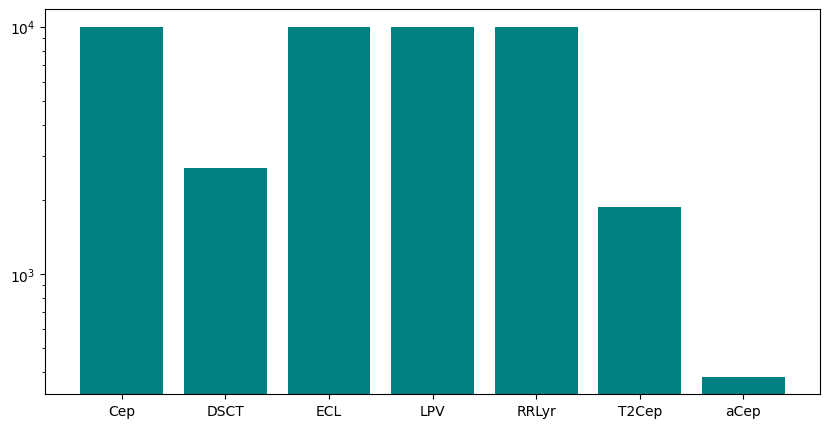

In [17]:
n = data.pivot_table(index=['Type'], aggfunc='size').index
s = list(data.pivot_table(index=['Type'], aggfunc='size'))

fig=plt.figure(figsize=(10,5))
line = plt.bar(n  , s  , color = 'teal' , log  = True )

#for i in range(len(s)):
#    plt.annotate(str(s[i]), xy=(n[i],s[i]), ha='center', va='bottom')

plt.show()
fig.savefig('NNhist.pdf',dpi=300)

array([[<Axes: title={'center': 'sub_class_number'}>]], dtype=object)

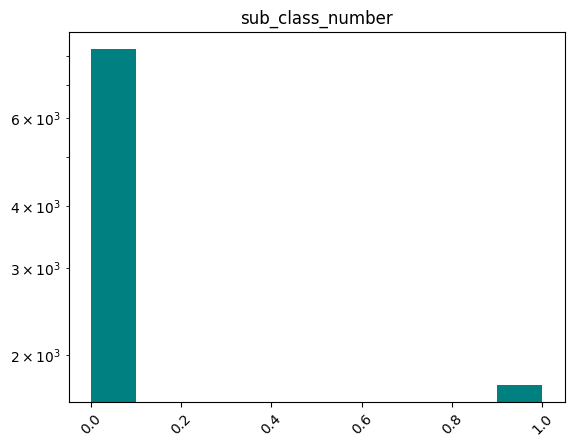

In [18]:
#plot histogram of each class 

df_new = df[df["class_number"]== 0] 
df_new.hist( column = 'sub_class_number' , color = 'teal',  log = True  , xrot = 45  ,  grid = False )

We create a sample of data which contains only 10,000 of the crowded classes.

In [19]:
df_0=df[df["class_number"]==0]
df_1=df[df["class_number"]==1]
df_2=df[df["class_number"]==2]
df_3=df[df["class_number"]==3]
df_4=df[df["class_number"]==4]
df_5=df[df["class_number"]==5]
df_6=df[df["class_number"]==6]

df_0 = shuffle(df_0,random_state=0)
df_1 = shuffle(df_1,random_state=1)
df_2 = shuffle(df_2,random_state=2)
df_3 = shuffle(df_3,random_state=3)
df_4 = shuffle(df_4,random_state=4)
df_5 = shuffle(df_5,random_state=5)
df_6 = shuffle(df_6,random_state=6)

In [20]:
if len(df_0)>10000:
        df_0 = df_0.sample(n=10000,random_state=0,axis=0)

if len(df_1)>10000:
        df_1 = df_1.sample(n=10000,random_state=0,axis=0)
        
if len(df_2)>10000:
        df_2 = df_2.sample(n=10000,random_state=0,axis=0)
        
if len(df_3)>10000:
        df_3 = df_3.sample(n=10000,random_state=0,axis=0)
        
if len(df_4)>10000:
        df_4 = df_4.sample(n=10000,random_state=0,axis=0)
if len(df_5)>10000:
        df_5 = df_5.sample(n=10000,random_state=0,axis=0)
if len(df_6)>10000:
        df_6 = df_6.sample(n=10000,random_state=0,axis=0)

In [21]:
data = pd.concat([df_0,df_1,df_2,df_3,df_4,df_5,df_6])

In [22]:
# to reduce memory usage!!!!
del(df_0,df_1,df_2,df_3,df_4,df_5,df_6)

In [23]:
data

,Type,Subtype,RA,Decl,I,V,P_1,A_1,info,class_number,sub_class_number
ID,,,,,,,,,,,
OGLE-LMC-ECL-04166,ECL,NC,04:58:18.78,-68:28:47.6,19.343,19.701,4.849247,0.629,[[5.26155978e+03 1.94100000e+01 6.00000000e-02...,0,0
OGLE-BLG-ECL-042720,ECL,NC,17:36:25.09,-22:11:24.1,18.539,20.600,2.049192,0.330,[[5.26582808e+03 1.86640000e+01 3.40000000e-02...,0,0
OGLE-BLG-ECL-109795,ECL,NC,17:47:50.64,-21:05:33.2,18.497,20.502,0.475625,0.322,[[5.26584145e+03 1.86480000e+01 3.80000000e-02...,0,0
OGLE-BLG-ECL-267306,ECL,NC,18:02:38.97,-29:04:19.5,18.830,20.316,0.394333,0.636,[[5.26087976e+03 1.92740000e+01 5.60000000e-02...,0,0
OGLE-BLG-ECL-107236,ECL,NC,17:47:29.84,-23:15:12.7,17.646,19.379,0.546769,0.197,[[5.26584446e+03 1.77330000e+01 2.10000000e-02...,0,0
...,...,...,...,...,...,...,...,...,...,...,...
OGLE-SMC-ACEP-074,aCep,F,01:10:54.53,-74:23:08.6,18.239,18.910,0.824632,0.358,[[5.34793160e+03 1.81470000e+01 2.10000000e-02...,6,0
OGLE-SMC-ACEP-104,aCep,F,02:14:51.37,-66:59:30.4,17.197,17.654,0.878026,0.571,[[6.24768313e+03 1.75090000e+01 1.90000000e-02...,6,0
OGLE-GAL-ACEP-109,aCep,F,18:37:01.36,-38:04:34.6,13.130,-99.990,1.127603,0.983,[[8.58774753e+03 1.32510000e+01 4.00000000e-03...,6,0


# Functions

In [32]:
#Gives the photometry data of a star by its name as the input

def star_photometry( DataFrame , star_name ):    
    d1 = DataFrame
    a = d1.loc[str(star_name),'info'].replace('\n','').replace(' ',',').replace('[','').replace(']','')
    b = a.split(',')
    q = a.split(',')
    while("" in b) : 
        b.remove("") 
    while("nan" in b) : 
        b.remove("nan") 
    d = np.array(b)
    c = d.reshape((int(len(b)/3),3))
    c = c.astype(float)
    return c

In [33]:
#Cleans up the shape pf the photometry of a sample

def star_photometry_2(star_info):    
    a = star_info.replace('\n','').replace(' ',',').replace('[','').replace(']','')
    b = a.split(',')
    q = a.split(',')
    while("" in b) : 
        b.remove("") 
    while("nan" in b) : 
        b.remove("nan") 
    d = np.array(b)
    c = d.reshape((int(len(b)/3),3))
    c = c.astype(float)
    return c

https://docs.lightkurve.org/api/lightkurve.lightcurve.FoldedLightCurve.html#lightkurve.lightcurve.FoldedLightCurve.scatter

In [34]:
#function for folding the lightcurve using lightkurve package

def fold_light_phase(DataFrame , star_name , period ):
      time = star_photometry(DataFrame , star_name)[:,0]
      lum = star_photometry(DataFrame , star_name)[:,1]
      lc = lk.LightCurve(time=time, flux=lum)
      folded_lc = lc.fold(period= period)
      return folded_lc

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binned_statistic.html

In [35]:
#function for binning the lightcurve using scipy

def binned_phase(DataFrame , star_name , period , method = 'mean' ,binned_number = 100):
    folded_lc = fold_light_phase(DataFrame, star_name , period)
    flux_axis = folded_lc.flux
    phase_axis = folded_lc.phase .value
    bin_means, bin_edges, binnumber = stats.binned_statistic( phase_axis , flux_axis , method , bins = binned_number)
    return bin_means, bin_edges, binnumber

In [36]:
#ONE hot encode function 
def one_hot_encode(X) :
    Z_array = np.zeros((int(X.T.size), int(X.T.max()+1)))
    Z_array[np.arange(X.T.size) , (X.T). astype(int)] = 1
    return  Z_array

In [29]:
class  Data_Prepair :
    import numpy as np
    from sklearn.model_selection import train_test_split
    import pandas as pd
    def __init__(self , Dataframe , binned_number = 50 
                ,model = 'defualt' , normalize = 'false' , with_period = 'false' 
                ,channel = 1 ,replacement = 'interp' , nan_number = 2 ):
        
        '''
        removing NaN and negative values in the period column
        '''
        Dataframe.dropna(subset = ['P_1'], inplace=True)
        Dataframe = Dataframe[ Dataframe['P_1'] > 0]

        '''
        we create a 'a matrix' which contains the folded timeseries which have bean binned and for every point
        ,the mean of the points in a bin, have been saved.
        '''
        data_photometry_binned = np.zeros([1,len(Dataframe),binned_number])
        data_period = np.zeros([1,len(Dataframe),binned_number])
        DT = np.zeros([len(Dataframe),2])
        List_wrong = []
        l = 0
        for i  in  (Dataframe.index): 
            #print(l)
            #print(i)
            star_name = i
            period = Dataframe.loc[i,'P_1'] 
            bin_means, bin_edges, binnumber = binned_phase(Dataframe , star_name , period 
                                                            ,method = 'mean' , binned_number =binned_number)
            data_photometry_binned[0][l] = bin_means
            data_period[0][l][:] = period
            DT[l] = Dataframe.loc[i, 'class_number' ] , Dataframe.loc[i, 'sub_class_number' ]
            l = l + 1

        data_photometry_binned = data_photometry_binned.reshape(data_photometry_binned.shape[1]
                                                                , data_photometry_binned.shape[2])
        data_period = data_period.reshape(data_period.shape[1]
                                        , data_period.shape[2])
        
        data_photometry_binned_shape = data_photometry_binned.shape

        #defining X and Y and T
        T = data_period
        X = data_photometry_binned
        Y = np.array(Dataframe['class_number'])
        Y = Y.reshape(data_photometry_binned.shape[0],1)

        # changing the value of nans to 0
        for i in range(X.shape[0]):
            in_arr = np.array(X[i]) 
            X[i] = np.nan_to_num(in_arr)

        #lets find the number of nan's(0's) in a row!
        l_list = []
        for i in range(X.shape[0]):
            occurrence = [(x, len(list(y))) for x, y in itertools.groupby(X[i])]
            l_list.append(occurrence)
        
        zeroes_list = []
        for i in range(len(l_list)):
            for j in range(len(l_list[i])):
                if l_list[i][j][0] == 0 :
                    zeroes_list.append(l_list[i][j][1]) 
                
        # this gives us the occurrence of 'n' nans in a row in all the data.
        for i in range(0,51):
            d = Counter(zeroes_list) 

        '''
        counting the classes of time series with more than '2' nan's in a row 
        (we want to delete the stars with nan sequences that are longer than 4
        , so we want to know how many stars of each class we are losing)
        '''
        y_list = []
        indexes = []
        nan_number = nan_number

        for i in range(len(l_list)):
            l = 0
            for j in range(len(l_list[i])):
                if l_list[i][j][0] == 0 :
                    if l_list[i][j][1] > nan_number:
                        if l == 0:
                            l = 1
                            y_list.append(Y[i])
                            indexes.append(i)          
                            
        if replacement == 'interp' : 
            '''
            replacing the nan values (i) with algorithm
            '''
            bin_edges_mean = np.zeros([binned_number,])
            for i in range(binned_number):
                bin_edges_mean[i] = ( bin_edges[i] + bin_edges[i+1] )/2
        
            for i in range(X.shape[0]):
                if i not in indexes:
                    #print(i)
                    j_list = []
                    zero_array = np.array([])
                    X_new = X[i].copy()
                    bin_edges_mean_new = bin_edges_mean.copy()

                    for j in range(X.shape[1]):
                        if X[i][j] == 0 :
                            #print(i)
                            j_list.append(j)
                            zero_array = np.append(zero_array,bin_edges_mean[j])

                    X_new = np.delete(X_new,j_list)
                    bin_edges_mean_new = np.delete(bin_edges_mean_new,j_list)
                    X_inter = np.interp(zero_array, bin_edges_mean_new, X_new)
                    
                    for k in range(len(j_list)):
                        X[i][j_list[k]] = X_inter[k]
        
        if replacement == 'mean' :
            '''
            replacing the nan values (i) with mean of the points i + 1 , i - 1 
            also deleting the data which have sequence of nans longer than 2
            '''
            for i in range(X.shape[0]):
                if i not in indexes:
                    for j in range(X.shape[1]):
                        
                        if X[i][j] == 0 :
                            if X[i][j+1] != 0:
                        
                                if j==0:
                                    X[i][j] = X[i][j+2] - 2*X[i][j+1]
                            
                                elif j==binned_number-1:
                                    X[i][j] = -X[i][j-2] + 2*X[i][j-1]
                        
                                else:
                                    #print(j)
                                    X[i][j] = (X[i][j+1] + X[i][j-1])/2 
                            else:
                                if j==0:
                                    X[i][j] = -2*X[i][j+3] + 3*X[i][j+2]
                                    X[i][j+1] = -X[i][j+3] + 2*X[i][j+2]
                            
                                elif j==binned_number-2:
                                    X[i][j] = -X[i][j-2] + 2*X[i][j-1]
                                    X[i][j+1] = -2*X[i][j-2] + 3*X[i][j-1]
                        
                                else:
                                    X[i][j] = (X[i][j+2] + 2*X[i][j-1])/3 
                                    X[i][j+1] = (2*X[i][j+2] + X[i][j-1])/3 

        # time to delete datas with more than nan_number nans in a row
        Y = np.delete(Y, indexes, 0)
        X = np.delete(X, indexes, 0)
        T = np.delete(T, indexes, 0)
        DT = np.delete( DT , indexes , 0 )

        #in this cell we sort array (min element is in 25 index) 
        for i in range(X.shape[0]):
            u = np.where(X[i] == X[i].min())[0][0]
            if u != int(binned_number/2) :
                a_prime= np.zeros([1,50])
                a_prime[0][int(binned_number/2) - u:] = X[i][0:  - int(binned_number/2) + u]
                a_prime[0][0: int(binned_number/2) - u ] = X[i][ - int(binned_number/2) + u :]
                X[i] = a_prime[0]

        #normalize X
        if  normalize == 'true' : 
            for i in range(X.shape[0]):
                X[i] = X[i] - X[i].mean()
        
        if  normalize == 'false' :  
            X[i] = X[i] 

        # making drivation of X
        if model == 'derivate':
            drivate_X = np.zeros(X.shape)
            for i in range(len(X)):
                drivate_X[i] = np.append(X[i],X[i,0])[1:] - X[i]
            X = drivate_X
        
        #reshape
        T = T.reshape(T.shape[0],T.shape[1],1)
        X = X.reshape(X.shape[0],X.shape[1],1)

        #X output
        if with_period == 'false' :
            X_out = X
            Y_out = Y
        
        if with_period == 'true' and channel == 2 :
            X_out = np.concatenate((X.T , T.T), axis = 0 ).T
            Y_out = Y
        
        if with_period == 'true' and channel == 1 :
            X_out = np.concatenate((X.T , T.T), axis = 1 ).T
            Y_out = Y
        
        self.X_out = X_out 
        self.Y_out = Y_out
        self.DT_out = DT


    def   Class_Split(self ,  sub_class_number = -1  , train_percent = 70  , validation_percent  = 10 , test_percent  = 20  ) :
            
            train_percent = train_percent / 100
            validation_percent = validation_percent /100
            test_percent = test_percent /100

            X_train, X_test , DT_train, DT_test = train_test_split(self.X_out , self.DT_out  
                                                                , random_state=0 
                                                                , test_size = 1 - train_percent)
            X_validation, X_test, DT_validation, DT_test = train_test_split(X_test, DT_test
                                                                        , random_state=0 
                                                                        , test_size =(test_percent/(validation_percent+test_percent)))
            if  sub_class_number == -1 :

                    Y_train = DT_train[:,0].reshape(len(X_train) , 1)
                    Y_test= DT_test[:,0].reshape(len(X_test) , 1)
                    Y_validation = DT_validation[:,0].reshape(len(X_validation) , 1)

                    headers=['Train ','Validation','Test','Total']
                    rows  = ['ECL', 'RRLyr', 'LPV' , 'DSCT' , 'Cep', 'T2Cep', 'aCep','Total']
                    inf = []

                    for  i in range(len(rows)-1) :
                        inf.append([np.count_nonzero( Y_train == i ),np.count_nonzero( Y_validation == i ) , np.count_nonzero( Y_test == i),
                                    np.count_nonzero( Y_train == i )+np.count_nonzero( Y_validation == i ) + np.count_nonzero( Y_test == i)])  
                    inf.append([ len(Y_train), len(Y_validation),len(Y_test), len(Y_train)+len(Y_validation)+len(Y_test)])  

                    display( pd.DataFrame(inf, rows, headers) )

                    return X_train, X_validation , X_test , Y_train,Y_validation ,Y_test
            
            if  sub_class_number > -1 :

                    index_list_train =[ ]
                    for i in range(len(X_train) ) :
                        if  DT_train[i,0] != (sub_class_number) :
                            index_list_train.append(i)

                    X_train = np.delete(X_train , index_list_train , 0)
                    Y_train = np.delete(DT_train ,index_list_train , 0).reshape(len(X_train) , 2)[:,1]

                    index_list_test =[ ]
                    for i in range(len(X_test) ) :
                        if  DT_test[i,0] != (sub_class_number) :
                            index_list_test.append(i)
                            
                    X_test = np.delete(X_test , index_list_test , 0)
                    Y_test = np.delete(DT_test ,index_list_test , 0).reshape(len(X_test) , 2)[:,1]

                    index_list_validation =[ ]
                    for i in range(len(X_validation) ) :
                        if  DT_validation[i,0] != (sub_class_number) :
                            index_list_validation.append(i)
                        
                    X_validation = np.delete(X_validation , index_list_validation , 0)
                    Y_validation= np.delete(DT_validation ,index_list_validation , 0).reshape(len(X_validation) , 2)[:,1]
                    
                    ECL_SUB_name =  [ 'NC','C']
                    RRLyr_SUB_name = [ 'RRab' , 'RRc']
                    LPV_SUB_name = [ 'Mira' , 'OSARG' , 'SRV' ]
                    DSCT_SUB_name = [ 'SINGLE' ]
                    Cep_SUB_name = [  'F'  , '1'  , '12' ]
                    T2Cep_SUB_name = [ 'BLHer'  , 'RVTau' , 'WVir']
                    aCep_SUB_name = [ 'F' , '1'  ]

                    sub_name_list = [ ECL_SUB_name , RRLyr_SUB_name , LPV_SUB_name 
                                    , DSCT_SUB_name ,Cep_SUB_name , T2Cep_SUB_name , aCep_SUB_name ]

                    headers=['Train ','Validation','Test','Total']
                    rows  = sub_name_list[sub_class_number]
                    rows.append('Total')
                    inf = [ ]
                    for  i in range(len(rows)-1) :
                        inf.append([np.count_nonzero( Y_train == i ) , np.count_nonzero( Y_validation == i ) , np.count_nonzero( Y_test == i),
                                    np.count_nonzero( Y_train == i )+np.count_nonzero( Y_validation == i ) + np.count_nonzero( Y_test == i)])  
                    
                    inf.append([ len(Y_train), len(Y_validation), len(Y_test), len(Y_train)+len(Y_validation)+len(Y_test)])  

                    display( pd.DataFrame(inf, rows, headers) )

                    return X_train, X_validation , X_test , Y_train,Y_validation ,Y_test

            if  sub_class_number == -2 :
                    list_class = [0,0,1,1,2,2,2,3,4,4,4,5,5,5,6,6]
                    list_sub_class = [0,1,0,1,0,1,2,0,0,1,2,0,1,2,0,1]

                    Y_train = np.zeros([len(DT_train),1])
                    for j in range(len(list_class)):
                        for i in range(len(DT_train)) :
                            if  DT_train[i][0] == list_class[j] and DT_train[i][1] == list_sub_class[j] :
                                Y_train[i][0] = j

                    Y_test = np.zeros([len(DT_test),1])
                    for j in range(len(list_class)):
                        for i in range(len(DT_test)) :
                            if  DT_test[i][0] == list_class[j] and DT_test[i][1] == list_sub_class[j] :
                                Y_test[i][0] = j

                    Y_validation = np.zeros([len(DT_validation),1])
                    for j in range(len(list_class)):
                        for i in range(len(DT_validation)) :
                            if  DT_validation[i][0] == list_class[j] and DT_validation[i][1] == list_sub_class[j] :
                                Y_validation[i][0] = j

                    headers=['Train ','Validation','Test','Total']
                    rows  =  [ 'NC' , 'C' ,  'RRab' , 'RRc' ,'Mira' , 'OSARG' , 'SRV' , 'SINGLE'
                                , 'F', '1' , '12' , 'BLHer'  , 'RVTau' , 'WVir' , 'F' , '1'  ,'Total']
                    inf = []

                    for  i in range(len(rows)-1) :
                        inf.append([np.count_nonzero( Y_train == i ),np.count_nonzero( Y_validation == i ) , np.count_nonzero( Y_test == i),
                                    np.count_nonzero( Y_train == i )+np.count_nonzero( Y_validation == i ) + np.count_nonzero( Y_test == i)])  
                    inf.append([ len(Y_train), len(Y_validation), len(Y_test),len(Y_train)+len(Y_validation)+len(Y_test)])  

                    display( pd.DataFrame(inf, rows, headers) )

                    return X_train, X_validation , X_test , Y_train,Y_validation ,Y_test
                    

In [ ]:
#https://blog.finxter.com/how-to-plot-sklearn-confusion-matrix-with-labels/
import numpy as np

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True,
                          size = [16,12],
                          file_name = False ):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    if cmap is None:
        cmap = plt.get_cmap('Greens')

    plt.figure(figsize=(size[0],size[1]))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title ,fontsize = 16 )
    plt.ylabel('True label' , fontsize = 16 )
    plt.xlabel('Predicted label', fontsize = 16 )
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)




    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            #if cm[i,j]>= 0.01 : # if you want remove 0.1>
                plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                        horizontalalignment="center",
                        color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    if file_name != False : 
        plt.savefig(file_name , dpi=300)
    plt.show()

# Check Folding and Binnig on a sample

In [37]:
star_name = "OGLE-LMC-CEP-0004"
period = data.loc[star_name,'P_1']
folded_lc = fold_light_phase(data , star_name , period)

In [38]:
time = star_photometry(data ,star_name)[:,0]
lum = star_photometry(data ,star_name)[:,1]
lc = lk.LightCurve(time=time, flux=lum)
folded_lc = lc.fold(period=data.loc[str(star_name),'P_1'])

In [39]:
y = folded_lc.flux
x = folded_lc.phase.value

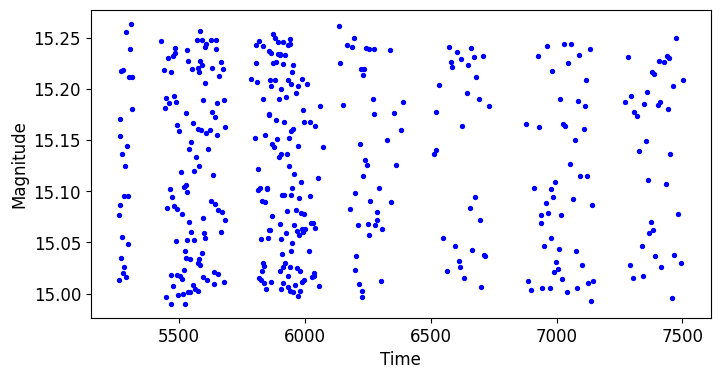

In [41]:
%matplotlib inline
photometry = star_photometry( data , star_name )
fig=plt.figure(figsize=(8,4))
plt.scatter(photometry[:,0],photometry[:,1] , c ='b', s = 8 )
plt.ylabel("Magnitude", fontsize=12 )
plt.xlabel("Time", fontsize=12 )
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
fig.savefig("raw_1.png", dpi = 300)

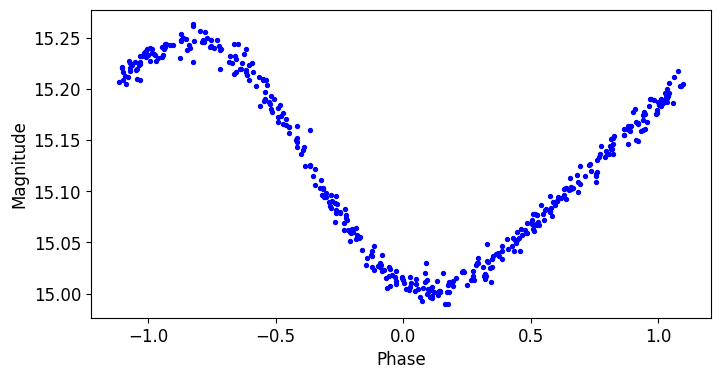

In [43]:
%matplotlib inline
fig=plt.figure(figsize=(8,4))
plt.scatter( x , y , c ='b' , s = 8)
plt.ylabel("Magnitude", fontsize=12 )
plt.xlabel("Phase", fontsize=12 )
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

fig.savefig("folded_1.png", dpi = 300)

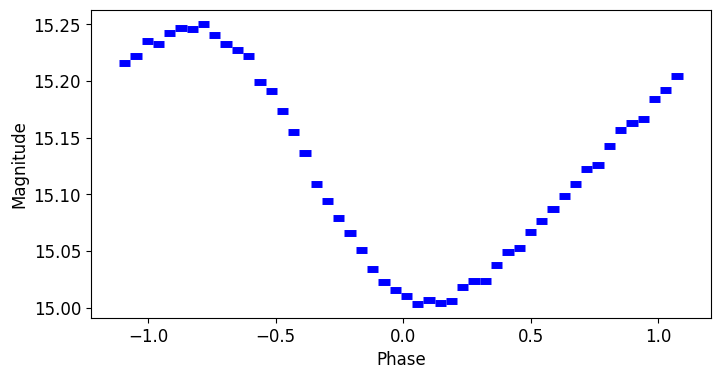

In [45]:
bin_means, bin_edges, binnumber = binned_phase(data , star_name , period , method = 'mean' , binned_number = 50)

fig=plt.figure(figsize=(8,4))
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='blue', lw=5 )

plt.ylabel("Magnitude", fontsize=12 )
plt.xlabel("Phase", fontsize=12 )
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

fig.savefig("binned_1.png", dpi = 300)

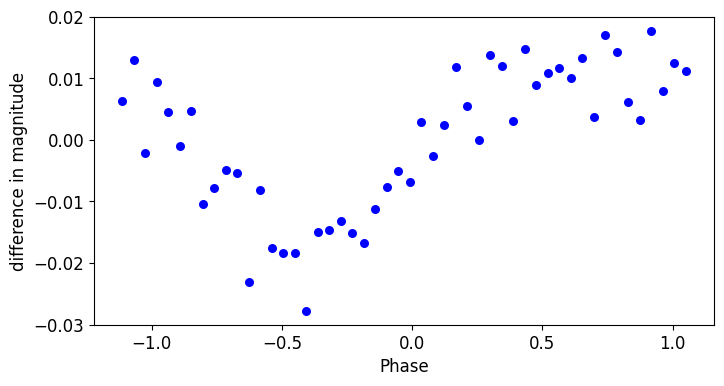

In [46]:
bin_means, bin_edges, binnumber = binned_phase(data , star_name , period , method = 'mean' ,binned_number = 50)
bin_means = np.append(bin_means,bin_means[0])[1:] - bin_means

fig=plt.figure(figsize=(8,4))
plt.scatter(bin_edges[:-1] , bin_means , c ='b', s = 30 )

plt.ylabel("difference in magnitude" , fontsize=12 )
plt.xlabel("Phase", fontsize=12 )
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

fig.savefig("derivate_1.png", dpi = 300)

In [48]:
star_name = "OGLE-BLG-ECL-042720"
period = data.loc[star_name,'P_1']
folded_lc = fold_light_phase(data , star_name , period)

In [49]:
time = star_photometry(data ,star_name)[:,0]
lum = star_photometry(data ,star_name)[:,1]
lc = lk.LightCurve(time=time, flux=lum)
folded_lc = lc.fold(period=data.loc[str(star_name),'P_1'])

In [50]:
y = folded_lc.flux
x = folded_lc.phase.value

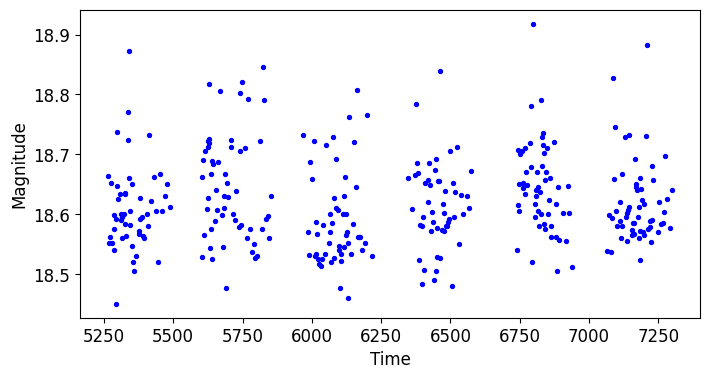

In [51]:
%matplotlib inline
photometry = star_photometry( data , star_name )
fig=plt.figure(figsize=(8,4))
plt.scatter(photometry[:,0],photometry[:,1] , c ='b', s = 8 )
plt.ylabel("Magnitude", fontsize=12 )
plt.xlabel("Time", fontsize=12 )
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

fig.savefig("raw_2.png", dpi = 300)

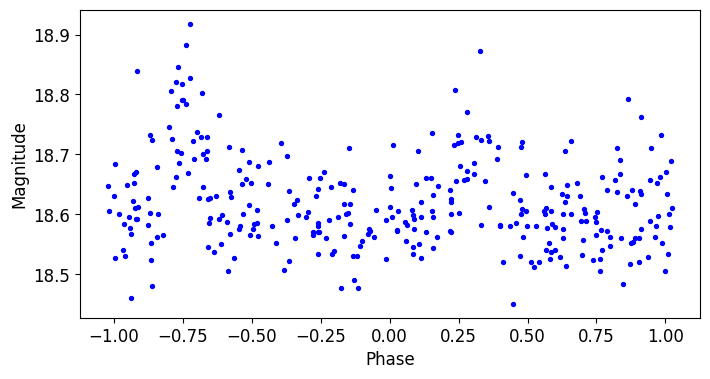

In [52]:
%matplotlib inline
fig=plt.figure(figsize=(8,4))
plt.scatter( x , y , c ='b' , s = 8)
plt.ylabel("Magnitude", fontsize=12 )
plt.xlabel("Phase", fontsize=12 )
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

fig.savefig("folded_2.png", dpi = 300)

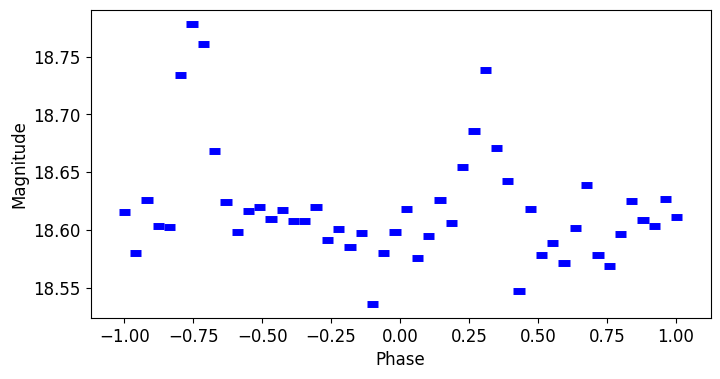

In [54]:
bin_means, bin_edges, binnumber = binned_phase(data , star_name , period , method = 'mean' , binned_number = 50)

fig=plt.figure(figsize=(8,4))
plt.hlines(bin_means , bin_edges[:-1], bin_edges[1:], colors='blue', lw=5 )

plt.ylabel("Magnitude", fontsize=12 )
plt.xlabel("Phase", fontsize=12 )
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

fig.savefig("binned_2.png", dpi = 300)

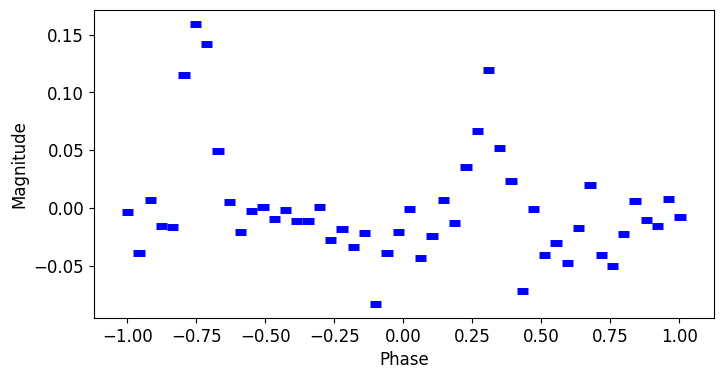

In [56]:
bin_means, bin_edges, binnumber = binned_phase(data , star_name , period , method = 'mean' , binned_number = 50)

fig=plt.figure(figsize=(8,4))
plt.hlines(bin_means - np.mean(bin_means) , bin_edges[:-1], bin_edges[1:], colors='blue', lw=5 )

plt.ylabel("Magnitude", fontsize=12 )
plt.xlabel("Phase", fontsize=12 )
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

fig.savefig("binned_2_nor.png", dpi = 300)

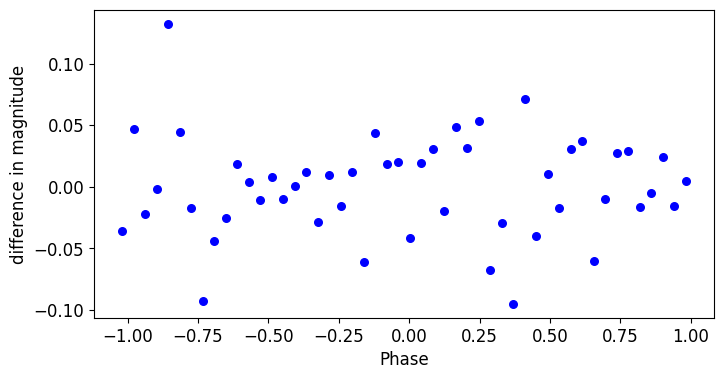

In [58]:
bin_means, bin_edges, binnumber = binned_phase(data , star_name , period , method = 'mean' ,binned_number = 50)
bin_means = np.append(bin_means,bin_means[0])[1:] - bin_means

fig=plt.figure(figsize=(8,4))
plt.scatter(bin_edges[:-1] , bin_means , c ='b', s = 30 )

plt.ylabel("difference in magnitude" , fontsize=12 )
plt.xlabel("Phase", fontsize=12 )
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

fig.savefig("derivate_2.png", dpi = 300)

In [62]:
y= []
x= []
star_name = ["OGLE-LMC-CEP-0004","OGLE-BLG-ECL-107236","OGLE-LMC-ACEP-089"]
DataFrame = df
for i in star_name:
    period = data.loc[i ,'P_1']
    folded_lc = fold_light_phase( data , i , period )
    y.append(folded_lc.flux)
    x.append(folded_lc.phase.value)

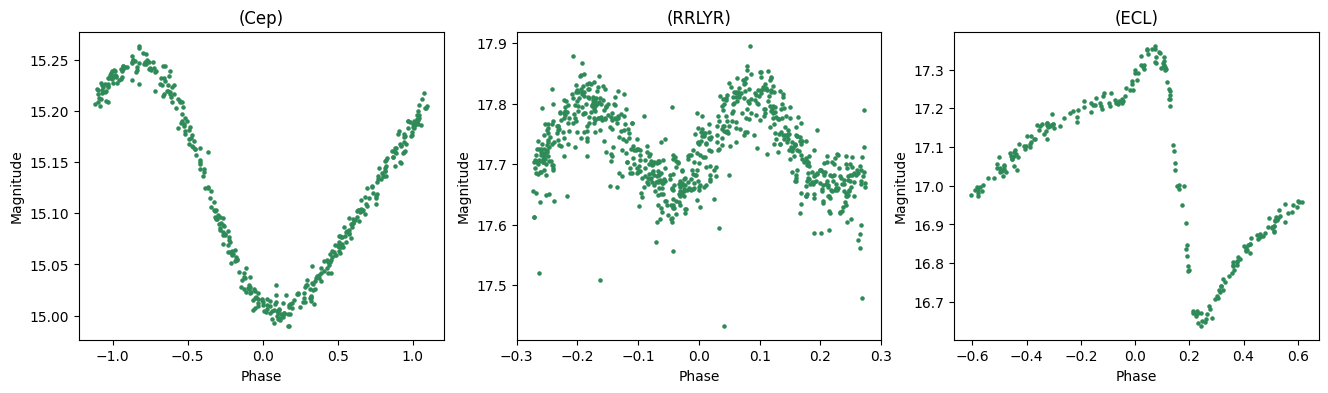

In [64]:
#Plotting 
fig=plt.figure(figsize=(16,4))
columns = 3
rows = 1
ax=["","",""]

label = ["(Cep)","(RRLYR)","(ECL)"]
for i in range(1,len(star_name)+1):
    ax[i-1]=fig.add_subplot(rows, columns, i)
    plt.scatter(x[i-1],y[i-1],color="seagreen",s=5) 
    ax[i-1].title.set_text(label[i-1])
    plt.xlabel("Phase")
    plt.ylabel("Magnitude")
#fig.suptitle("Fourier Transform", size=30)    
plt.show()

fig.savefig('folded.pdf',dpi=300)

<Axes: xlabel='Time [JD]', ylabel='Flux'>

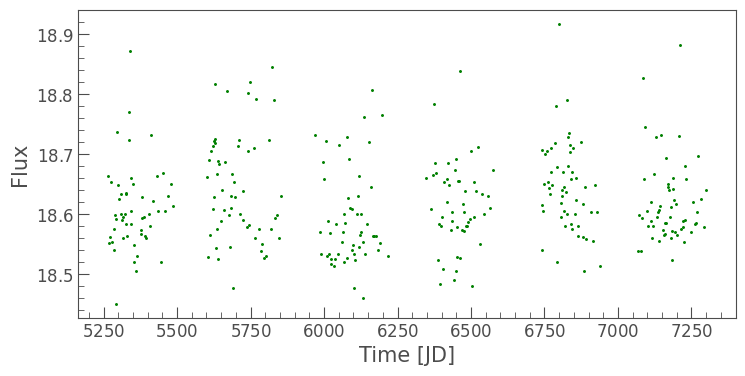

In [65]:
lc.scatter(s=5,color="g")

In [66]:
star_name = "OGLE-LMC-CEP-0004"
period = data.loc[star_name,'P_1']
bin_means, bin_edges, binnumber = binned_phase(data , star_name , period , method = 'mean' ,binned_number = 20)

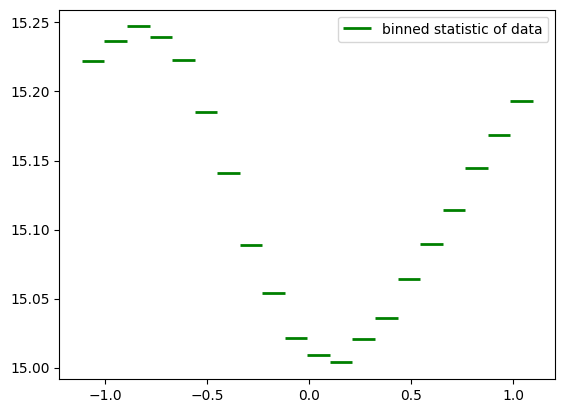

In [67]:
%matplotlib inline
plt.figure()
#plt.hist(binnumber, bins=100, density=True, histtype='stepfilled',alpha=0.2, label='histogram of data')
#plt.plot(b, a , 'ro', label='analytical pdf')
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='g', lw=2,label='binned statistic of data')
#plt.plot((binnumber - 0.5) * bin_width, x_pdf, 'g.', alpha=0.5)
plt.legend(fontsize=10)
plt.show()

# Folding and Binning (Method 1), Replacement of NANs with Period information_Normalize(mag), DERIVATE

## Preparing data and train, test & validation sets


we create a 'a matrix' which contains the folded timeseries which have bean binned and for every point,
the mean of the points in a bin, have been saved.


In [ ]:
 %%time
 data_inf = Data_Prepair(data , binned_number = 50, model = 'derivate', with_period = 'true' , channel = 2 ) 

CPU times: user 16min 9s, sys: 9.39 s, total: 16min 18s
Wall time: 16min 8s


In [ ]:
%%time
# Defining train, test and validation sets for all 3 parts of model 1, model 2 and testing the combination of models
X_train, X_validation , X_test , Y_train ,Y_validation ,Y_test = data_inf.Class_Split(-1, 70 , 10 , 20)

,Train,Validation,Test,Total
ECL,6956,983,2006,9945
RRLyr,6681,949,1889,9519
LPV,6944,1010,1960,9914
DSCT,1880,273,525,2678
Cep,6624,938,1916,9478
T2Cep,1221,190,372,1783
aCep,272,25,69,366
Total,30578,4368,8737,43683


CPU times: user 43.1 ms, sys: 870 µs, total: 43.9 ms
Wall time: 41.9 ms


A brief explanation of what we are about to do:
First I define 3 zero arrays to fill their elements with labels we are about to predict in first part of the model.
By changing class labels related to ACep and T2Cep classes, we're going to have 3 labels remained.
After that I define 'Y_encoded's for all train, test and validation data.

In [ ]:
# Defining the 0 arrays

Y_prime_train = np.array(Y_train, dtype=int)
Y_prime_test = np.array(Y_test, dtype=int)
Y_prime_validation = np.array(Y_validation, dtype=int)

In [ ]:
# changing the labels so that class 5 & 6 will be in class 4

for i in range(len(Y_train)):
    if Y_train[i] == 5:
        Y_prime_train[i] = 4
    elif Y_train[i] == 6:
        Y_prime_train[i] = 4
    else:
        Y_prime_train[i] = Y_train[i]
        
for i in range(len(Y_test)):
    if Y_test[i] == 5:
        Y_prime_test[i] = 4
    elif Y_test[i] == 6:
        Y_prime_test[i] = 4
    else:
        Y_prime_test[i] = Y_test[i]
        
for i in range(len(Y_validation)):
    if Y_validation[i] == 5:
        Y_prime_validation[i] = 4
    elif Y_validation[i] == 6:
        Y_prime_validation[i] = 4
    else:
        Y_prime_validation[i] = Y_validation[i]


In [ ]:
# one hot encode!!

b = np.zeros((int(Y_prime_train.T.size), int(Y_prime_train.T.max()+1)))
b[np.arange(Y_prime_train.T.size),Y_prime_train.T] = 1
Y_encoded_train = b

b = np.zeros((int(Y_prime_test.T.size), int(Y_prime_test.T.max()+1)))
b[np.arange(Y_prime_test.T.size),Y_prime_test.T] = 1
Y_encoded_test = b

b = np.zeros((int(Y_prime_validation.T.size), int(Y_prime_validation.T.max()+1)))
b[np.arange(Y_prime_validation.T.size),Y_prime_validation.T] = 1
Y_encoded_validation = b

del(b)

Now we're about to make train, test and validation sets for part 2 of the model. The goal is to predict class 2 , 3 and 4.
First we need to get rid of the class 0 and 1 in all the 3 train, test and validation data. Then we choose 500 random samples from class 2 and 3, to balance the data.
Then we change the labels 2, 3 and 4 to 0, 1 and 2.
After that we create one hot encoded arrays and we're done.

In [ ]:

# Deleting samples on classes 0 and 1 from the data

ind=[]
for i in range(len(Y_train)):
    if Y_train[i] == 0:
        ind.append(i)
    if Y_train[i] == 1:
        ind.append(i)
    if Y_train[i] == 2:
        ind.append(i)
    elif Y_train[i] == 3:
        ind.append(i)

Y_train_2 = np.delete(Y_train, ind, axis = 0)
X_train_2 = np.delete(X_train, ind, axis = 0)

ind=[]
for i in range(len(Y_test)):
    if Y_test[i] == 0:
        ind.append(i)
    if Y_test[i] == 1:
        ind.append(i)
    if Y_test[i] == 2:
        ind.append(i)
    elif Y_test[i] == 3:
        ind.append(i)

Y_test_2 = np.delete(Y_test, ind, axis = 0)
X_test_2 = np.delete(X_test, ind, axis = 0)

ind=[]
for i in range(len(Y_validation)):
    if Y_validation[i] == 0:
        ind.append(i)
    if Y_validation[i] == 1:
        ind.append(i)
    if Y_validation[i] == 2:
        ind.append(i)
    elif Y_validation[i] == 3:
        ind.append(i)

Y_validation_2 = np.delete(Y_validation, ind, axis = 0)
X_validation_2 = np.delete(X_validation, ind, axis = 0)


In [ ]:


#defining 0 arrays as part 1, this time to change class 2, 3, 4 to 0, 1, 2

Y_prime_train_2 = np.array(Y_train_2, dtype=int)
Y_prime_test_2 = np.array(Y_test_2, dtype=int)
Y_prime_validation_2 = np.array(Y_validation_2, dtype=int)


In [ ]:

# changing the labels

for i in range(len(Y_train_2)):
    if Y_train_2[i] == 4:
        Y_prime_train_2[i] = 0
    elif Y_train_2[i] == 5:
        Y_prime_train_2[i] = 1
    elif Y_train_2[i] == 6:
        Y_prime_train_2[i] = 2
        
for i in range(len(Y_test_2)):
    if Y_test_2[i] == 4:
        Y_prime_test_2[i] = 0
    elif Y_test_2[i] == 5:
        Y_prime_test_2[i] = 1
    elif Y_test_2[i] == 6:
        Y_prime_test_2[i] = 2
        
for i in range(len(Y_validation_2)):
    if Y_validation_2[i] == 4:
        Y_prime_validation_2[i] = 0
    elif Y_validation_2[i] == 5:
        Y_prime_validation_2[i] = 1
    elif Y_validation_2[i] == 6:
        Y_prime_validation_2[i] = 2

In [ ]:
# one hot encode!!

b = np.zeros((int(Y_prime_train_2.T.size), int(Y_prime_train_2.T.max()+1)))
b[np.arange(Y_prime_train_2.T.size),Y_prime_train_2.T] = 1
Y_encoded_train_2 = b

b = np.zeros((int(Y_prime_test_2.T.size), int(Y_prime_test_2.T.max()+1)))
b[np.arange(Y_prime_test_2.T.size),Y_prime_test_2.T] = 1
Y_encoded_test_2 = b

b = np.zeros((int(Y_prime_validation_2.T.size), int(Y_prime_validation_2.T.max()+1)))
b[np.arange(Y_prime_validation_2.T.size),Y_prime_validation_2.T] = 1
Y_encoded_validation_2 = b

In [ ]:
# Weights of classes to use in model fitting 

ind0= 0
ind1= 0
ind2= 0
for i in range(len(Y_prime_train_2)):
    if Y_prime_train_2[i]==0:
        ind0 = ind0+1
    if Y_prime_train_2[i]==1:
        ind1 = ind1+1
    if Y_prime_train_2[i]==2:
        ind2 = ind2+1
weight_for_0 = (1 / ind0)*(len(Y_prime_train_2))/3.0 
weight_for_1 = (1 / ind1)*(len(Y_prime_train_2))/3.0 
weight_for_2 = (1 / ind2)*(len(Y_prime_train_2))/3.0  


class_weight = {0: weight_for_0, 1: weight_for_1 , 2: weight_for_2  }

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))
print('Weight for class 2: {:.2f}'.format(weight_for_2))

Weight for class 0: 0.41
Weight for class 1: 2.22
Weight for class 2: 9.95


## Convolutional NN

###Class

The First model

In [ ]:
n_h, n_w = X_train[0].shape
print( n_h , n_w )

50 2


In [ ]:
first_model = models.Sequential()


first_model.add(layers.Conv1D(filters=8, kernel_size = 3 , activation='sigmoid', input_shape=(n_h, n_w)))
first_model.add(layers.Flatten())

first_model.add(layers.Dense(32, activation='relu'))
first_model.add(layers.Dense(64, activation='relu'))
first_model.add(layers.Dense(32, activation='relu'))

first_model.add(layers.Dense(5, activation='softmax'))

first_model.compile(loss='categorical_crossentropy', optimizer='ADAM', metrics=['categorical_accuracy'])

first_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 48, 8)             56        
_________________________________________________________________
flatten (Flatten)            (None, 384)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                12320     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 165       
Total params: 16,733
Trainable params: 16,733
Non-trainable params: 0
____________________________________________________

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=120, monitor="val_loss"),
    tf.keras.callbacks.ModelCheckpoint(filepath='1.1.h5', 
                                       monitor='val_categorical_accuracy',
                                       mode='max',
                                       save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir=f'logs_{first_model.name}', update_freq=100),
]

In [ ]:
%%time
history = first_model.fit(X_train ,Y_encoded_train, 
                    epochs=150, batch_size =64 ,
                    callbacks = my_callbacks,
                    validation_data = (X_validation, Y_encoded_validation))

Epoch 1/150
478/478 [==============================] - 36s 7ms/step - loss: 0.7668 - categorical_accuracy: 0.6640 - val_loss: 0.6469 - val_categorical_accuracy: 0.6948
Epoch 2/150
478/478 [==============================] - 3s 6ms/step - loss: 0.6461 - categorical_accuracy: 0.7057 - val_loss: 0.6457 - val_categorical_accuracy: 0.7001
Epoch 3/150
478/478 [==============================] - 3s 6ms/step - loss: 0.5809 - categorical_accuracy: 0.7642 - val_loss: 0.4724 - val_categorical_accuracy: 0.8315
Epoch 4/150
478/478 [==============================] - 3s 6ms/step - loss: 0.3551 - categorical_accuracy: 0.8773 - val_loss: 0.2485 - val_categorical_accuracy: 0.9245
Epoch 5/150
478/478 [==============================] - 3s 5ms/step - loss: 0.2275 - categorical_accuracy: 0.9265 - val_loss: 0.1842 - val_categorical_accuracy: 0.9432
Epoch 6/150
478/478 [==============================] - 3s 6ms/step - loss: 0.1812 - categorical_accuracy: 0.9396 - val_loss: 0.1555 - val_categorical_accuracy: 0.94

In [ ]:
Y_predicted = np.argmax( first_model.predict(X_test) , axis=1 )
Y_expected = np.argmax( Y_encoded_test , axis=1 )
report = classification_report(Y_expected, Y_predicted)
print(report)
cm = confusion_matrix(Y_expected, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2006
           1       0.99      0.98      0.98      1889
           2       0.99      1.00      0.99      1960
           3       0.99      0.99      0.99       525
           4       0.98      0.99      0.99      2357

    accuracy                           0.99      8737
   macro avg       0.99      0.99      0.99      8737
weighted avg       0.99      0.99      0.99      8737

[[1974    3   24    1    4]
 [   1 1855    0    3   30]
 [   3    0 1956    0    1]
 [   0    4    0  519    2]
 [   2   21    5    2 2327]]


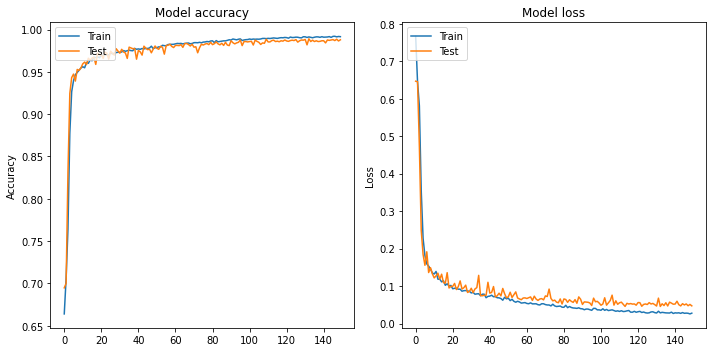

In [ ]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
first_model.save('/content/drive/MyDrive/OGLE4_NN/Models/derivate_first_conv.h5')

In [ ]:
file_path = '/content/drive/MyDrive/OGLE4_NN/Models/derivate_first_conv.h5'
first_model = load_model(file_path)

In [ ]:
Y_predicted = np.argmax( first_model.predict(X_test) , axis=1 )
Y_expected = np.argmax( Y_encoded_test , axis=1 )
report = classification_report(Y_expected, Y_predicted)
print(report)

cm = confusion_matrix(Y_expected, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2006
           1       0.99      0.98      0.98      1889
           2       0.99      1.00      0.99      1960
           3       0.99      0.99      0.99       525
           4       0.98      0.99      0.99      2357

    accuracy                           0.99      8737
   macro avg       0.99      0.99      0.99      8737
weighted avg       0.99      0.99      0.99      8737

[[1974    3   24    1    4]
 [   1 1855    0    3   30]
 [   3    0 1956    0    1]
 [   0    4    0  519    2]
 [   2   21    5    2 2327]]


The second model

In [ ]:
second_model = models.Sequential()


second_model.add(layers.Conv1D(filters=8, kernel_size=3, activation='sigmoid', input_shape=(n_h, n_w)))
second_model.add(layers.Flatten())

second_model.add(layers.Dense(32, activation='relu'))
second_model.add(layers.Dense(64, activation='relu'))
second_model.add(layers.Dense(32, activation='relu'))

second_model.add(layers.Dense(3, activation='softmax'))

second_model.compile(loss='categorical_crossentropy', optimizer='ADAM', metrics=['categorical_accuracy'])

second_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 48, 8)             56        
_________________________________________________________________
flatten_2 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                12320     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 99        
Total params: 16,667
Trainable params: 16,667
Non-trainable params: 0
__________________________________________________

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=200, monitor="val_categorical_accuracy"),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_categorical_accuracy:.2f}.h5', 
                                       monitor='val_categorical_accuracy',
                                       mode='max',
                                       save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir=f'logs_{second_model.name}', update_freq=10),
]

In [ ]:
%%time
history = second_model.fit(X_train_2,Y_encoded_train_2, 
                            epochs=200, batch_size = 32 , 
                            callbacks = my_callbacks,
                            validation_data = (X_validation_2, Y_encoded_validation_2))

Epoch 1/200
254/254 [==============================] - 3s 8ms/step - loss: 0.4882 - categorical_accuracy: 0.8357 - val_loss: 0.4523 - val_categorical_accuracy: 0.8352
Epoch 2/200
254/254 [==============================] - 1s 6ms/step - loss: 0.4580 - categorical_accuracy: 0.8442 - val_loss: 0.4641 - val_categorical_accuracy: 0.8465
Epoch 3/200
254/254 [==============================] - 1s 6ms/step - loss: 0.4534 - categorical_accuracy: 0.8449 - val_loss: 0.4387 - val_categorical_accuracy: 0.8439
Epoch 4/200
254/254 [==============================] - 1s 5ms/step - loss: 0.4479 - categorical_accuracy: 0.8454 - val_loss: 0.4333 - val_categorical_accuracy: 0.8500
Epoch 5/200
254/254 [==============================] - 1s 6ms/step - loss: 0.4461 - categorical_accuracy: 0.8454 - val_loss: 0.4509 - val_categorical_accuracy: 0.8404
Epoch 6/200
254/254 [==============================] - 1s 6ms/step - loss: 0.4461 - categorical_accuracy: 0.8449 - val_loss: 0.4448 - val_categorical_accuracy: 0.844

In [ ]:
Y_predicted = np.argmax( second_model.predict(X_test_2) , axis=1 )
Y_expected = np.argmax( Y_encoded_test_2 , axis=1 )
report = classification_report(Y_expected, Y_predicted)
print(report)
cm = confusion_matrix(Y_expected, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1916
           1       0.89      0.91      0.90       372
           2       0.83      0.70      0.76        69

    accuracy                           0.96      2357
   macro avg       0.90      0.86      0.88      2357
weighted avg       0.96      0.96      0.96      2357

[[1870   40    6]
 [  28  340    4]
 [  20    1   48]]


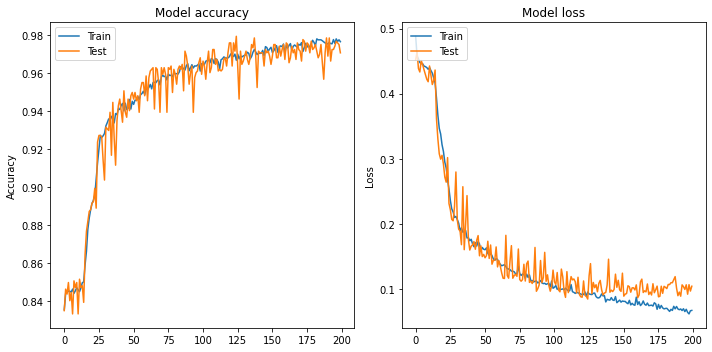

In [ ]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
second_model.save('/content/drive/MyDrive/OGLE4_NN/Models/derivate_second_conv.h5')

In [ ]:
file_path = '/content/drive/MyDrive/OGLE4_NN/Models/derivate_second_conv.h5'
second_model = load_model(file_path)

In [ ]:
Y_predicted = np.argmax( second_model.predict(X_test_2) , axis=1 )
Y_expected = np.argmax( Y_encoded_test_2 , axis=1 )
report = classification_report(Y_expected, Y_predicted)
print(report)
cm = confusion_matrix(Y_expected, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1916
           1       0.89      0.91      0.90       372
           2       0.83      0.70      0.76        69

    accuracy                           0.96      2357
   macro avg       0.90      0.86      0.88      2357
weighted avg       0.96      0.96      0.96      2357

[[1870   40    6]
 [  28  340    4]
 [  20    1   48]]


Using combination of the models to predict the test set we defined at the first.
By model 1, we predict which samples are from cepheid class, then we use model 2 to predict the type of three remained classes.

In [ ]:
#loading the best model

file_path = '/content/drive/MyDrive/OGLE4_NN/Models/derivate_first_conv.h5'
first_model = load_model(file_path)
file_path = '/content/drive/MyDrive/OGLE4_NN/Models/derivate_second_conv.h5'
second_model = load_model(file_path)

In [ ]:
%%time
# one hot encode!!

b = np.zeros((int(Y_test.T.size), int(Y_test.T.max()+1)))
b[np.arange(Y_test.T.size), (Y_test.T). astype(int)] = 1
Y_encoded_test_final = b

Y_first = np.argmax( first_model.predict(X_test) , axis=1 ) #prediction of model 1

indexes = []

for i in range(len(Y_first)):
    if Y_first[i] != 4:
        indexes.append(i)
        
X_2 = np.delete(X_test, indexes, axis=0)  # deleting predicted class 0 and 1 samples from test data
Y_2 = np.delete(Y_encoded_test_final, indexes, axis=0)

Y_second = np.argmax( second_model.predict(X_2) , axis=1 ) #prediction of model 2

for i in range(len(Y_second)):
    if Y_second[i]==0:
        Y_second[i] = 4
    elif Y_second[i]==1:
        Y_second[i] = 5
    elif Y_second[i]==2:
        Y_second[i] = 6

ind = []

for i in range(len(Y_first)):
    if Y_first[i] == 4:
        ind.append(i)
        
X_3 = np.delete(X_test, ind, axis=0)
Y_3 = np.delete(Y_first, ind, axis=0)

Y_part_1 = np.delete(Y_encoded_test_final, ind, axis=0)
Y_part_2 = np.delete(Y_encoded_test_final, indexes, axis=0)
Y_true = np.concatenate((Y_part_1, Y_part_2), axis=0)

Y_predicted = np.concatenate((Y_3, Y_second), axis=0)
Y_expected = np.argmax( Y_true , axis=1 )
report = classification_report(Y_expected, Y_predicted)
print(report)
cm = confusion_matrix(Y_expected, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2006
           1       0.99      0.98      0.98      1889
           2       0.99      1.00      0.99      1960
           3       0.99      0.99      0.99       525
           4       0.96      0.97      0.96      1916
           5       0.88      0.90      0.89       372
           6       0.78      0.68      0.73        69

    accuracy                           0.98      8737
   macro avg       0.94      0.93      0.93      8737
weighted avg       0.98      0.98      0.98      8737

[[1974    3   24    1    1    3    0]
 [   1 1855    0    3   26    0    4]
 [   3    0 1956    0    0    1    0]
 [   0    4    0  519    2    0    0]
 [   1   18    0    2 1850   40    5]
 [   1    1    5    0   28  333    4]
 [   0    2    0    0   19    1   47]]
CPU times: user 794 ms, sys: 66.1 ms, total: 860 ms
Wall time: 741 ms


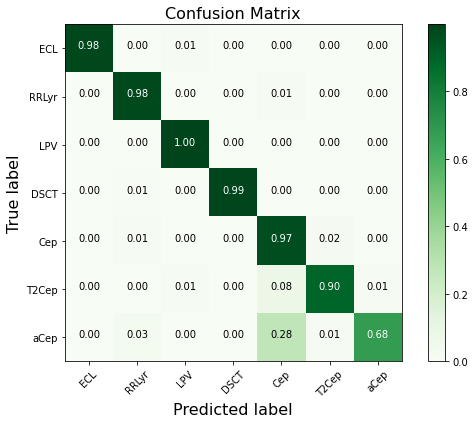

In [ ]:
labels  =  ['ECL', 'RRLyr', 'LPV' , 'DSCT' , 'Cep', 'T2Cep', 'aCep']
plot_confusion_matrix(cm = cm , 
                      normalize    = True,
                      target_names = labels ,
                      title  = "Confusion Matrix",
                      size = [8,6] ,
                      file_name = 'NN_DER_CM_CNN_GP.pdf')

###Sub_class

In [ ]:
%%time
data_inf = Data_Prepair(data , binned_number = 50, model = 'derivate', with_period = 'true'  , channel = 2  ) 

####ECL

In [ ]:
X_sub_train_ECL, X_sub_validation_ECL , X_sub_test_ECL , Y_sub_train_ECL ,Y_sub_validation_ECL ,Y_sub_test_ECL = data_inf.Class_Split(0, 70 , 10 , 20)

,Train,Validation,Test,Total
NC,5735,827,1647,8209
C,1221,156,359,1736
Total,6956,983,2006,9945


In [ ]:
Y_sub_train_ECL = one_hot_encode(Y_sub_train_ECL)
Y_sub_test_ECL = one_hot_encode(Y_sub_test_ECL)
Y_sub_validation_ECL = one_hot_encode(Y_sub_validation_ECL)

In [ ]:
n_h, n_w = X_sub_train_ECL.shape[1] , X_sub_train_ECL.shape[2]

In [ ]:
model_ECL = models.Sequential()
model_ECL.add(layers.Conv1D(filters=8, kernel_size=3, activation='sigmoid', input_shape=(n_h, n_w)))
model_ECL.add(layers.Flatten())

model_ECL.add(layers.Dense(32, activation='relu'))
model_ECL.add(layers.Dense(64, activation='relu'))
model_ECL.add(layers.Dense(32, activation='relu'))

model_ECL.add(layers.Dense(2, activation='softmax'))

model_ECL.compile(loss='categorical_crossentropy', optimizer='ADAM', metrics=['categorical_accuracy'])

model_ECL.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 48, 8)             56        
_________________________________________________________________
flatten_3 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                12320     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 66        
Total params: 16,634
Trainable params: 16,634
Non-trainable params: 0
__________________________________________________

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=150, monitor="val_loss"),
    tf.keras.callbacks.ModelCheckpoint(filepath='1.1.h5', 
                                       monitor='val_categorical_accuracy',
                                       mode='max',
                                       save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir=f'logs_{model_ECL.name}', update_freq=100),
]

In [ ]:
%%time
history = model_ECL.fit(X_sub_train_ECL,Y_sub_train_ECL, 
                    epochs=200, batch_size =64 ,
                    callbacks = my_callbacks,
                    validation_data = (X_sub_validation_ECL, Y_sub_validation_ECL))

Epoch 1/200
109/109 [==============================] - 2s 12ms/step - loss: 0.4195 - categorical_accuracy: 0.8176 - val_loss: 0.3990 - val_categorical_accuracy: 0.8413
Epoch 2/200
109/109 [==============================] - 1s 6ms/step - loss: 0.3804 - categorical_accuracy: 0.8245 - val_loss: 0.3512 - val_categorical_accuracy: 0.8413
Epoch 3/200
109/109 [==============================] - 1s 6ms/step - loss: 0.3713 - categorical_accuracy: 0.8245 - val_loss: 0.3587 - val_categorical_accuracy: 0.8413
Epoch 4/200
109/109 [==============================] - 1s 6ms/step - loss: 0.3730 - categorical_accuracy: 0.8245 - val_loss: 0.3547 - val_categorical_accuracy: 0.8413
Epoch 5/200
109/109 [==============================] - 1s 6ms/step - loss: 0.3696 - categorical_accuracy: 0.8245 - val_loss: 0.3454 - val_categorical_accuracy: 0.8413
Epoch 6/200
109/109 [==============================] - 1s 6ms/step - loss: 0.3682 - categorical_accuracy: 0.8245 - val_loss: 0.3509 - val_categorical_accuracy: 0.84

In [ ]:
Y_predicted = np.argmax( model_ECL.predict(X_sub_test_ECL) , axis=1 )
Y_expected = np.argmax( Y_sub_test_ECL , axis=1 )
report = classification_report(Y_expected, Y_predicted)
print(report)

cm = confusion_matrix(Y_expected, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1647
           1       0.64      0.68      0.66       359

    accuracy                           0.87      2006
   macro avg       0.78      0.80      0.79      2006
weighted avg       0.88      0.87      0.88      2006

[[1511  136]
 [ 116  243]]


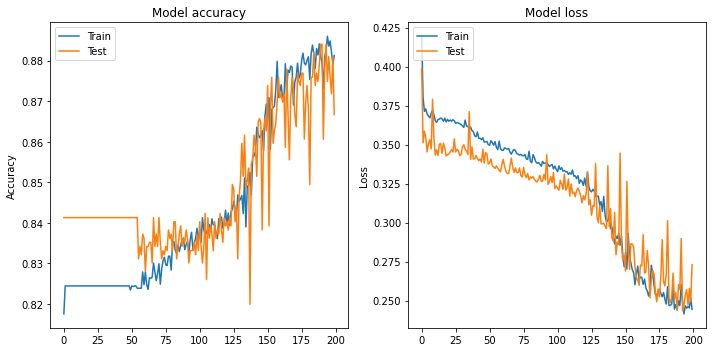

In [ ]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
model_ECL.save('/content/drive/MyDrive/OGLE4_NN/Models/derivate_ECL_conv.h5')

In [ ]:
file_path = '/content/drive/MyDrive/OGLE4_NN/Models/derivate_ECL_conv.h5'
model_ECL = load_model(file_path)

In [ ]:
Y_predicted = np.argmax( model_ECL.predict(X_sub_test_ECL) , axis=1 )
Y_expected = np.argmax( Y_sub_test_ECL , axis=1 )
report = classification_report(Y_expected, Y_predicted)
print(report)

cm = confusion_matrix(Y_expected, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1647
           1       0.64      0.68      0.66       359

    accuracy                           0.87      2006
   macro avg       0.78      0.80      0.79      2006
weighted avg       0.88      0.87      0.88      2006

[[1511  136]
 [ 116  243]]


####RRLyr

In [ ]:
X_sub_train_RRL, X_sub_validation_RRL , X_sub_test_RRL , Y_sub_train_RRL ,Y_sub_validation_RRL ,Y_sub_test_RRL = data_inf.Class_Split(1, 70 , 10 , 20)

,Train,Validation,Test,Total
RRab,5026,690,1379,7095
RRc,1655,259,510,2424
Total,6681,949,1889,9519


In [ ]:
Y_sub_train_RRL = one_hot_encode(Y_sub_train_RRL)
Y_sub_test_RRL = one_hot_encode(Y_sub_test_RRL)
Y_sub_validation_RRL = one_hot_encode(Y_sub_validation_RRL)

In [ ]:
n_h, n_w = X_sub_train_RRL.shape[1] , X_sub_train_RRL.shape[2]

In [ ]:
model_RRL = models.Sequential()
model_RRL.add(layers.Conv1D(filters=8, kernel_size=3, activation='sigmoid', input_shape=(n_h, n_w)))
model_RRL.add(layers.Flatten())

model_RRL.add(layers.Dense(32, activation='relu'))
model_RRL.add(layers.Dense(64, activation='relu'))
model_RRL.add(layers.Dense(32, activation='relu'))

model_RRL.add(layers.Dense(2, activation='softmax'))

model_RRL.compile(loss='categorical_crossentropy', optimizer='ADAM', metrics=['categorical_accuracy'])

model_RRL.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 48, 8)             56        
_________________________________________________________________
flatten_5 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 32)                12320     
_________________________________________________________________
dense_21 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_22 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 66        
Total params: 16,634
Trainable params: 16,634
Non-trainable params: 0
__________________________________________________

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=80, monitor="val_loss"),
    tf.keras.callbacks.ModelCheckpoint(filepath='1.1.h5', 
                                       monitor='val_categorical_accuracy',
                                       mode='max',
                                       save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir=f'logs_{model_RRL.name}', update_freq=100),
]

In [ ]:
%%time
history = model_RRL.fit( X_sub_train_RRL,Y_sub_train_RRL, 
                    epochs=30, batch_size =64 ,
                    callbacks = my_callbacks,
                    validation_data = (X_sub_validation_RRL , Y_sub_validation_RRL))

Epoch 1/30
105/105 [==============================] - 2s 12ms/step - loss: 0.5569 - categorical_accuracy: 0.7466 - val_loss: 0.5559 - val_categorical_accuracy: 0.7271
Epoch 2/30
105/105 [==============================] - 1s 6ms/step - loss: 0.3454 - categorical_accuracy: 0.8400 - val_loss: 0.0899 - val_categorical_accuracy: 0.9863
Epoch 3/30
105/105 [==============================] - 1s 6ms/step - loss: 0.0767 - categorical_accuracy: 0.9729 - val_loss: 0.0583 - val_categorical_accuracy: 0.9852
Epoch 4/30
105/105 [==============================] - 1s 6ms/step - loss: 0.0556 - categorical_accuracy: 0.9799 - val_loss: 0.0476 - val_categorical_accuracy: 0.9842
Epoch 5/30
105/105 [==============================] - 1s 6ms/step - loss: 0.0495 - categorical_accuracy: 0.9816 - val_loss: 0.0316 - val_categorical_accuracy: 0.9863
Epoch 6/30
105/105 [==============================] - 1s 6ms/step - loss: 0.0477 - categorical_accuracy: 0.9820 - val_loss: 0.0973 - val_categorical_accuracy: 0.9642
Epo

In [ ]:
Y_predicted = np.argmax( model_RRL.predict(X_sub_test_RRL) , axis=1 )
Y_expected = np.argmax( Y_sub_test_RRL , axis=1 )
report = classification_report(Y_expected, Y_predicted)
print(report)

cm = confusion_matrix(Y_expected, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1379
           1       1.00      1.00      1.00       510

    accuracy                           1.00      1889
   macro avg       1.00      1.00      1.00      1889
weighted avg       1.00      1.00      1.00      1889

[[1377    2]
 [   0  510]]


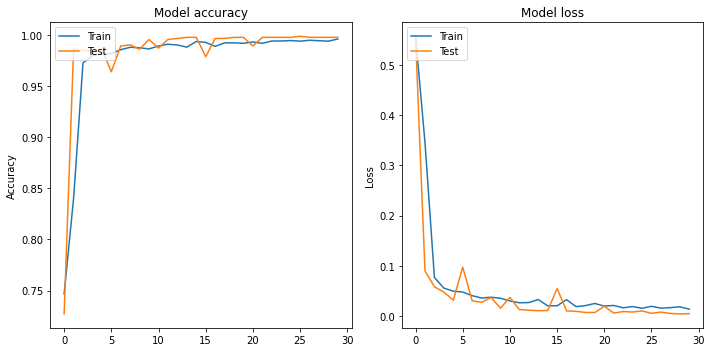

In [ ]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
model_RRL.save('/content/drive/MyDrive/OGLE4_NN/Models/derivate_RRL_conv.h5')

In [ ]:
file_path = '/content/drive/MyDrive/OGLE4_NN/Models/derivate_RRL_conv.h5'
model_RRL = load_model(file_path)

In [ ]:
Y_predicted = np.argmax( model_RRL.predict(X_sub_test_RRL) , axis=1 )
Y_expected = np.argmax( Y_sub_test_RRL , axis=1 )
report = classification_report(Y_expected, Y_predicted)
print(report)

cm = confusion_matrix(Y_expected, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1379
           1       1.00      1.00      1.00       510

    accuracy                           1.00      1889
   macro avg       1.00      1.00      1.00      1889
weighted avg       1.00      1.00      1.00      1889

[[1377    2]
 [   0  510]]


####LPV

In [ ]:
X_sub_train_LPV, X_sub_validation_LPV , X_sub_test_LPV , Y_sub_train_LPV ,Y_sub_validation_LPV ,Y_sub_test_LPV = data_inf.Class_Split(2, 70 , 10 , 20)

,Train,Validation,Test,Total
Mira,137,15,36,188
OSARG,5929,845,1681,8455
SRV,878,150,243,1271
Total,6944,1010,1960,9914


In [ ]:
Y_sub_train_LPV = one_hot_encode(Y_sub_train_LPV)
Y_sub_test_LPV = one_hot_encode(Y_sub_test_LPV)
Y_sub_validation_LPV = one_hot_encode(Y_sub_validation_LPV)

In [ ]:
n_h, n_w = X_sub_train_LPV.shape[1] , X_sub_train_LPV.shape[2]

In [ ]:
model_LPV = models.Sequential()
model_LPV.add(layers.Conv1D(filters=8, kernel_size=3, activation='sigmoid', input_shape=(n_h, n_w)))
model_LPV.add(layers.Flatten())

model_LPV.add(layers.Dense(32, activation='relu'))
model_LPV.add(layers.Dense(64, activation='relu'))
model_LPV.add(layers.Dense(32, activation='relu'))

model_LPV.add(layers.Dense(3, activation='softmax'))

model_LPV.compile(loss='categorical_crossentropy', optimizer='ADAM', metrics=['categorical_accuracy'])

model_LPV.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 48, 8)             56        
_________________________________________________________________
flatten_12 (Flatten)         (None, 384)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 32)                12320     
_________________________________________________________________
dense_49 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_50 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_51 (Dense)             (None, 3)                 99        
Total params: 16,667
Trainable params: 16,667
Non-trainable params: 0
_________________________________________________

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=180, monitor="val_loss"),
    tf.keras.callbacks.ModelCheckpoint(filepath='1.1.h5', 
                                       monitor='val_categorical_accuracy',
                                       mode='max',
                                       save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir=f'logs_{model_LPV.name}', update_freq=100),
]

In [ ]:
%%time
history = model_LPV.fit( X_sub_train_LPV,Y_sub_train_LPV, 
                    epochs=240, batch_size =64 ,
                    callbacks = my_callbacks,
                    validation_data = (X_sub_validation_LPV , Y_sub_validation_LPV))

Epoch 1/240
109/109 [==============================] - 2s 11ms/step - loss: 0.3608 - categorical_accuracy: 0.8538 - val_loss: 0.3016 - val_categorical_accuracy: 0.8366
Epoch 2/240
109/109 [==============================] - 1s 6ms/step - loss: 0.2739 - categorical_accuracy: 0.8577 - val_loss: 0.2785 - val_categorical_accuracy: 0.8535
Epoch 3/240
109/109 [==============================] - 1s 6ms/step - loss: 0.2595 - categorical_accuracy: 0.8821 - val_loss: 0.2555 - val_categorical_accuracy: 0.8970
Epoch 4/240
109/109 [==============================] - 1s 6ms/step - loss: 0.2434 - categorical_accuracy: 0.8926 - val_loss: 0.2661 - val_categorical_accuracy: 0.8733
Epoch 5/240
109/109 [==============================] - 1s 6ms/step - loss: 0.2449 - categorical_accuracy: 0.8952 - val_loss: 0.2550 - val_categorical_accuracy: 0.8851
Epoch 6/240
109/109 [==============================] - 1s 6ms/step - loss: 0.2454 - categorical_accuracy: 0.8893 - val_loss: 0.2573 - val_categorical_accuracy: 0.90

In [ ]:
Y_predicted = np.argmax( model_LPV.predict(X_sub_test_LPV) , axis=1 )
Y_expected = np.argmax( Y_sub_test_LPV , axis=1 )
report = classification_report(Y_expected, Y_predicted)
print(report)

cm = confusion_matrix(Y_expected, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       0.97      0.98      0.97      1681
           2       0.82      0.77      0.80       243

    accuracy                           0.95      1960
   macro avg       0.91      0.92      0.91      1960
weighted avg       0.95      0.95      0.95      1960

[[  36    0    0]
 [   0 1640   41]
 [   2   53  188]]


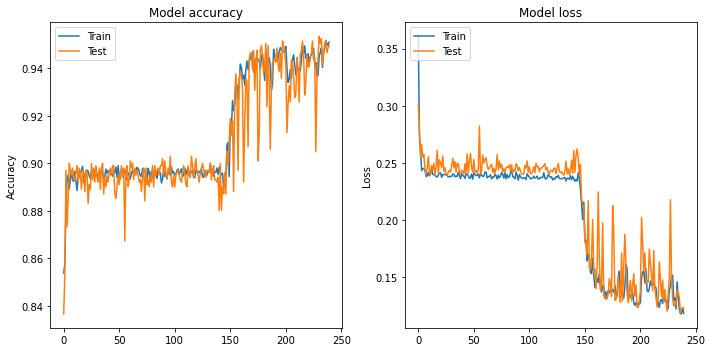

In [ ]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
model_LPV.save('/content/drive/MyDrive/OGLE4_NN/Models/derivate_LPV_conv.h5')

In [ ]:
file_path = '/content/drive/MyDrive/OGLE4_NN/Models/derivate_LPV_conv.h5'
model_LPV = load_model(file_path)

In [ ]:
Y_predicted = np.argmax( model_LPV.predict(X_sub_test_LPV) , axis=1 )
Y_expected = np.argmax( Y_sub_test_LPV , axis=1 )
report = classification_report(Y_expected, Y_predicted)
print(report)

cm = confusion_matrix(Y_expected, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       0.97      0.98      0.97      1681
           2       0.82      0.77      0.80       243

    accuracy                           0.95      1960
   macro avg       0.91      0.92      0.91      1960
weighted avg       0.95      0.95      0.95      1960

[[  36    0    0]
 [   0 1640   41]
 [   2   53  188]]


####CEP

In [ ]:
X_sub_train_CEP, X_sub_validation_CEP , X_sub_test_CEP , Y_sub_train_CEP ,Y_sub_validation_CEP ,Y_sub_test_CEP = data_inf.Class_Split(4, 70 , 10 , 20)

,Train,Validation,Test,Total
F,3701,537,1077,5315
1,2464,325,680,3469
12,459,76,159,694
Total,6624,938,1916,9478


In [ ]:
Y_sub_train_CEP = one_hot_encode(Y_sub_train_CEP)
Y_sub_test_CEP = one_hot_encode(Y_sub_test_CEP)
Y_sub_validation_CEP = one_hot_encode(Y_sub_validation_CEP)

In [ ]:
n_h, n_w = X_sub_train_CEP.shape[1] , X_sub_train_CEP.shape[2]

In [ ]:
model_CEP = models.Sequential()
model_CEP.add(layers.Conv1D(filters=8, kernel_size=3, activation='sigmoid', input_shape=(n_h, n_w)))
model_CEP.add(layers.Flatten())

model_CEP.add(layers.Dense(32, activation='relu'))
model_CEP.add(layers.Dense(64, activation='relu'))
model_CEP.add(layers.Dense(32, activation='relu'))

model_CEP.add(layers.Dense(3, activation='softmax'))

model_CEP.compile(loss='categorical_crossentropy', optimizer='ADAM', metrics=['categorical_accuracy'])

model_CEP.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 48, 8)             56        
_________________________________________________________________
flatten_8 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 32)                12320     
_________________________________________________________________
dense_33 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_34 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_35 (Dense)             (None, 3)                 99        
Total params: 16,667
Trainable params: 16,667
Non-trainable params: 0
__________________________________________________

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=150, monitor="val_loss"),
    tf.keras.callbacks.ModelCheckpoint(filepath='1.1.h5', 
                                       monitor='val_categorical_accuracy',
                                       mode='max',
                                       save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir=f'logs_{model_CEP.name}', update_freq=100),
]

In [ ]:
%%time
history = model_CEP.fit( X_sub_train_CEP,Y_sub_train_CEP, 
                    epochs=210, batch_size =64 ,
                    callbacks = my_callbacks,
                    validation_data = (X_sub_validation_CEP, Y_sub_validation_CEP))

Epoch 1/210
104/104 [==============================] - 2s 11ms/step - loss: 0.7138 - categorical_accuracy: 0.6399 - val_loss: 0.6952 - val_categorical_accuracy: 0.6407
Epoch 2/210
104/104 [==============================] - 1s 6ms/step - loss: 0.6390 - categorical_accuracy: 0.6484 - val_loss: 0.6407 - val_categorical_accuracy: 0.6429
Epoch 3/210
104/104 [==============================] - 1s 6ms/step - loss: 0.6196 - categorical_accuracy: 0.6505 - val_loss: 0.6342 - val_categorical_accuracy: 0.6311
Epoch 4/210
104/104 [==============================] - 1s 6ms/step - loss: 0.6089 - categorical_accuracy: 0.6641 - val_loss: 0.6156 - val_categorical_accuracy: 0.6439
Epoch 5/210
104/104 [==============================] - 1s 6ms/step - loss: 0.6026 - categorical_accuracy: 0.6680 - val_loss: 0.6156 - val_categorical_accuracy: 0.6375
Epoch 6/210
104/104 [==============================] - 1s 6ms/step - loss: 0.5965 - categorical_accuracy: 0.6701 - val_loss: 0.6044 - val_categorical_accuracy: 0.64

In [ ]:
Y_predicted = np.argmax( model_CEP.predict(X_sub_test_CEP) , axis=1 )
Y_expected = np.argmax( Y_sub_test_CEP , axis=1 )
report = classification_report(Y_expected, Y_predicted)
print(report)

cm = confusion_matrix(Y_expected, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1077
           1       0.91      0.93      0.92       680
           2       0.71      0.72      0.71       159

    accuracy                           0.94      1916
   macro avg       0.87      0.88      0.87      1916
weighted avg       0.94      0.94      0.94      1916

[[1058   17    2]
 [   3  631   46]
 [   0   44  115]]


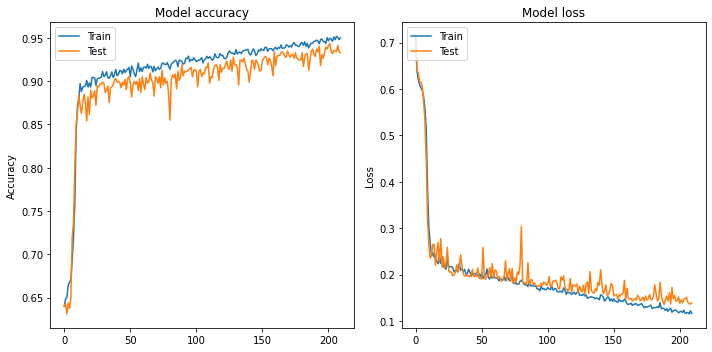

In [ ]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
model_CEP.save('/content/drive/MyDrive/OGLE4_NN/Models/derivate_CEP_conv.h5')

In [ ]:
file_path = '/content/drive/MyDrive/OGLE4_NN/Models/derivate_CEP_conv.h5'
model_CEP= load_model(file_path)

In [ ]:
Y_predicted = np.argmax( model_CEP.predict(X_sub_test_CEP) , axis=1 )
Y_expected = np.argmax( Y_sub_test_CEP , axis=1 )
report = classification_report(Y_expected, Y_predicted)
print(report)

cm = confusion_matrix(Y_expected, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1077
           1       0.91      0.93      0.92       680
           2       0.71      0.72      0.71       159

    accuracy                           0.94      1916
   macro avg       0.87      0.88      0.87      1916
weighted avg       0.94      0.94      0.94      1916

[[1058   17    2]
 [   3  631   46]
 [   0   44  115]]


####T2CEP

In [ ]:
X_sub_train_T2CEP, X_sub_validation_T2CEP , X_sub_test_T2CEP , Y_sub_train_T2CEP ,Y_sub_validation_T2CEP ,Y_sub_test_T2CEP = data_inf.Class_Split(5, 70 , 10 , 20)

,Train,Validation,Test,Total
BLHer,502,80,165,747
RVTau,241,36,69,346
WVir,478,74,138,690
Total,1221,190,372,1783


In [ ]:
Y_sub_train_T2CEP = one_hot_encode(Y_sub_train_T2CEP)
Y_sub_test_T2CEP = one_hot_encode(Y_sub_test_T2CEP)
Y_sub_validation_T2CEP = one_hot_encode(Y_sub_validation_T2CEP)

In [ ]:
n_h, n_w = X_sub_train_T2CEP.shape[1] , X_sub_train_T2CEP.shape[2]

In [ ]:
model_T2CEP = models.Sequential()
model_T2CEP.add(layers.Conv1D(filters=8, kernel_size=3, activation='sigmoid', input_shape=(n_h, n_w)))
model_T2CEP.add(layers.Flatten())

model_T2CEP.add(layers.Dense(32, activation='relu'))
model_T2CEP.add(layers.Dense(64, activation='relu'))
model_T2CEP.add(layers.Dense(32, activation='relu'))

model_T2CEP.add(layers.Dense(3, activation='softmax'))

model_T2CEP.compile(loss='categorical_crossentropy', optimizer='ADAM', metrics=['categorical_accuracy'])

model_T2CEP.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 48, 8)             56        
_________________________________________________________________
flatten_9 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 32)                12320     
_________________________________________________________________
dense_37 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_38 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_39 (Dense)             (None, 3)                 99        
Total params: 16,667
Trainable params: 16,667
Non-trainable params: 0
__________________________________________________

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=80, monitor="val_loss"),
    tf.keras.callbacks.ModelCheckpoint(filepath='1.1.h5', 
                                       monitor='val_categorical_accuracy',
                                       mode='max',
                                       save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir=f'logs_{model_T2CEP.name}', update_freq=100),
]

In [ ]:
%%time
history = model_T2CEP.fit( X_sub_train_T2CEP,Y_sub_train_T2CEP, 
                    epochs=120 , batch_size =32 ,
                    callbacks = my_callbacks,
                    validation_data = (X_sub_validation_T2CEP, Y_sub_validation_T2CEP))

Epoch 1/120
39/39 [==============================] - 2s 25ms/step - loss: 0.7285 - categorical_accuracy: 0.7445 - val_loss: 0.2719 - val_categorical_accuracy: 0.9421
Epoch 2/120
39/39 [==============================] - 0s 6ms/step - loss: 0.1760 - categorical_accuracy: 0.9525 - val_loss: 0.0948 - val_categorical_accuracy: 0.9684
Epoch 3/120
39/39 [==============================] - 0s 7ms/step - loss: 0.0694 - categorical_accuracy: 0.9869 - val_loss: 0.0473 - val_categorical_accuracy: 1.0000
Epoch 4/120
39/39 [==============================] - 0s 6ms/step - loss: 0.0498 - categorical_accuracy: 0.9853 - val_loss: 0.0374 - val_categorical_accuracy: 0.9947
Epoch 5/120
39/39 [==============================] - 0s 6ms/step - loss: 0.0374 - categorical_accuracy: 0.9959 - val_loss: 0.0455 - val_categorical_accuracy: 0.9737
Epoch 6/120
39/39 [==============================] - 0s 6ms/step - loss: 0.0364 - categorical_accuracy: 0.9861 - val_loss: 0.0713 - val_categorical_accuracy: 0.9579
Epoch 7/1

In [ ]:
Y_predicted = np.argmax( model_T2CEP.predict(X_sub_test_T2CEP) , axis=1 )
Y_expected = np.argmax( Y_sub_test_T2CEP , axis=1 )
report = classification_report(Y_expected, Y_predicted)
print(report)

cm = confusion_matrix(Y_expected, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       165
           1       0.99      0.97      0.98        69
           2       0.99      0.97      0.98       138

    accuracy                           0.98       372
   macro avg       0.98      0.98      0.98       372
weighted avg       0.98      0.98      0.98       372

[[165   0   0]
 [  0  67   2]
 [  3   1 134]]


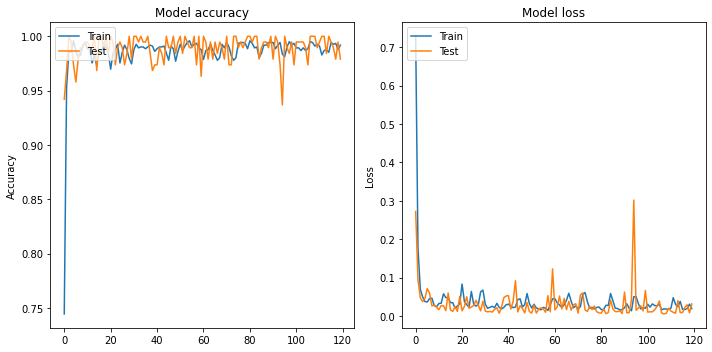

In [ ]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
model_T2CEP.save('/content/drive/MyDrive/OGLE4_NN/Models/derivate_T2CEP_conv.h5')

In [ ]:
file_path = '/content/drive/MyDrive/OGLE4_NN/Models/derivate_T2CEP_conv.h5'
model_T2CEP= load_model(file_path)

In [ ]:
Y_predicted = np.argmax( model_T2CEP.predict(X_sub_test_T2CEP) , axis=1 )
Y_expected = np.argmax( Y_sub_test_T2CEP , axis=1 )
report = classification_report(Y_expected, Y_predicted)
print(report)

cm = confusion_matrix(Y_expected, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       165
           1       0.99      0.97      0.98        69
           2       0.99      0.97      0.98       138

    accuracy                           0.98       372
   macro avg       0.98      0.98      0.98       372
weighted avg       0.98      0.98      0.98       372

[[165   0   0]
 [  0  67   2]
 [  3   1 134]]


####ACEP

In [ ]:
X_sub_train_ACEP, X_sub_validation_ACEP , X_sub_test_ACEP , Y_sub_train_ACEP ,Y_sub_validation_ACEP ,Y_sub_test_ACEP = data_inf.Class_Split(6, 70 , 10 , 20)

,Train,Validation,Test,Total
F,187,14,45,246
1,85,11,24,120
Total,272,25,69,366


In [ ]:
Y_sub_train_ACEP = one_hot_encode(Y_sub_train_ACEP)
Y_sub_test_ACEP = one_hot_encode(Y_sub_test_ACEP)
Y_sub_validation_ACEP = one_hot_encode(Y_sub_validation_ACEP)

In [ ]:
n_h, n_w = X_sub_train_ACEP.shape[1] , X_sub_train_ACEP.shape[2]

In [ ]:
model_ACEP = models.Sequential()
model_ACEP.add(layers.Conv1D(filters=8, kernel_size=3, activation='sigmoid', input_shape=(n_h, n_w)))
model_ACEP.add(layers.Flatten())

model_ACEP.add(layers.Dense(32, activation='relu'))
model_ACEP.add(layers.Dense(64, activation='relu'))
model_ACEP.add(layers.Dense(32, activation='relu'))

model_ACEP.add(layers.Dense(2, activation='softmax'))

model_ACEP.compile(loss='categorical_crossentropy', optimizer='ADAM', metrics=['categorical_accuracy'])

model_ACEP.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 48, 8)             56        
_________________________________________________________________
flatten_10 (Flatten)         (None, 384)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 32)                12320     
_________________________________________________________________
dense_41 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_42 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_43 (Dense)             (None, 2)                 66        
Total params: 16,634
Trainable params: 16,634
Non-trainable params: 0
_________________________________________________

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=80, monitor="val_loss"),
    tf.keras.callbacks.ModelCheckpoint(filepath='1.1.h5', 
                                       monitor='val_categorical_accuracy',
                                       mode='max',
                                       save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir=f'logs_{model_ACEP.name}', update_freq=100),
]

In [ ]:
%%time
history = model_ACEP.fit( X_sub_train_ACEP,Y_sub_train_ACEP, 
                    epochs=80, batch_size = 8 ,
                    callbacks = my_callbacks,
                    validation_data = (X_sub_validation_ACEP, Y_sub_validation_ACEP))

Epoch 1/80
34/34 [==============================] - 2s 24ms/step - loss: 0.6049 - categorical_accuracy: 0.6875 - val_loss: 0.6430 - val_categorical_accuracy: 0.5600
Epoch 2/80
34/34 [==============================] - 0s 6ms/step - loss: 0.5341 - categorical_accuracy: 0.7132 - val_loss: 0.4855 - val_categorical_accuracy: 0.9200
Epoch 3/80
34/34 [==============================] - 0s 5ms/step - loss: 0.4488 - categorical_accuracy: 0.7831 - val_loss: 0.3519 - val_categorical_accuracy: 0.9200
Epoch 4/80
34/34 [==============================] - 0s 5ms/step - loss: 0.4637 - categorical_accuracy: 0.7537 - val_loss: 0.6334 - val_categorical_accuracy: 0.5600
Epoch 5/80
34/34 [==============================] - 0s 5ms/step - loss: 0.4347 - categorical_accuracy: 0.7610 - val_loss: 0.3219 - val_categorical_accuracy: 0.8800
Epoch 6/80
34/34 [==============================] - 0s 5ms/step - loss: 0.4667 - categorical_accuracy: 0.7647 - val_loss: 0.3423 - val_categorical_accuracy: 0.8800
Epoch 7/80
34/3

In [ ]:
Y_predicted = np.argmax( model_ACEP.predict(X_sub_test_ACEP) , axis=1 )
Y_expected = np.argmax( Y_sub_test_ACEP , axis=1 )
report = classification_report(Y_expected, Y_predicted)
print(report)

cm = confusion_matrix(Y_expected, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.96      1.00      0.98        24

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69

[[44  1]
 [ 0 24]]


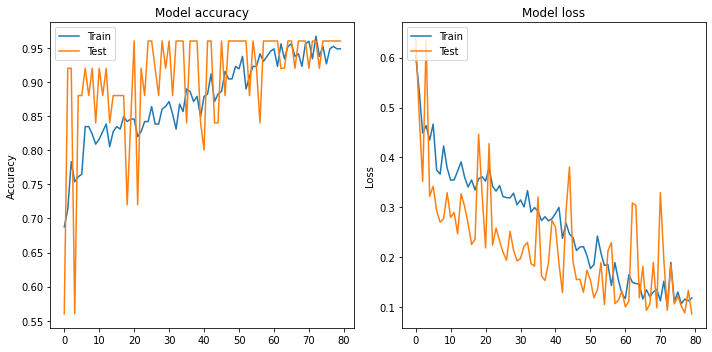

In [ ]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
model_ACEP.save('/content/drive/MyDrive/OGLE4_NN/Models/derivate_ACEP_conv.h5')

In [ ]:
file_path = '/content/drive/MyDrive/OGLE4_NN/Models/derivate_ACEP_conv.h5'
model_ACEP= load_model(file_path)

In [ ]:
Y_predicted = np.argmax( model_ACEP.predict(X_sub_test_ACEP) , axis=1 )
Y_expected = np.argmax( Y_sub_test_ACEP , axis=1 )
report = classification_report(Y_expected, Y_predicted)
print(report)

cm = confusion_matrix(Y_expected, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.96      1.00      0.98        24

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69

[[44  1]
 [ 0 24]]


###ALL_TOGETHER

In [ ]:
#CLASS
#loading the best model
file_path = '/content/drive/MyDrive/OGLE4_NN/Models/derivate_first_conv.h5'
first_model = load_model(file_path)
file_path = '/content/drive/MyDrive/OGLE4_NN/Models/derivate_second_conv.h5'
second_model = load_model(file_path)

In [ ]:
#SUB_CLASS
#loading the best model
file_path = '/content/drive/MyDrive/OGLE4_NN/Models/derivate_ECL_conv.h5'
model_ECL = load_model(file_path)
file_path = '/content/drive/MyDrive/OGLE4_NN/Models/derivate_RRL_conv.h5'
model_RRL = load_model(file_path)
file_path = '/content/drive/MyDrive/OGLE4_NN/Models/derivate_LPV_conv.h5'
model_LPV = load_model(file_path)
file_path = '/content/drive/MyDrive/OGLE4_NN/Models/derivate_CEP_conv.h5'
model_CEP= load_model(file_path)
file_path = '/content/drive/MyDrive/OGLE4_NN/Models/derivate_T2CEP_conv.h5'
model_T2CEP= load_model(file_path)
file_path = '/content/drive/MyDrive/OGLE4_NN/Models/derivate_ACEP_conv.h5'
model_ACEP= load_model(file_path)

In [ ]:
%%time
 data_inf = Data_Prepair(data , binned_number = 50, model = 'derivate'  , with_period = 'true'  , channel = 2  ) 

In [ ]:
%%time
X_gen_train, X_gen_validation , X_gen_test , Y_gen_train ,Y_gen_validation ,Y_gen_test = data_inf.Class_Split(-2, 70 , 10 , 20)

,Train,Validation,Test,Total
NC,5735,827,1647,8209
C,1221,156,359,1736
RRab,5026,690,1379,7095
RRc,1655,259,510,2424
Mira,137,15,36,188
OSARG,5929,845,1681,8455
SRV,878,150,243,1271
SINGLE,1880,273,525,2678
F,3701,537,1077,5315
1,2464,325,680,3469


CPU times: user 577 ms, sys: 1.11 ms, total: 578 ms
Wall time: 583 ms


In [ ]:
%%time
Y_first = np.argmax( first_model.predict(X_gen_test) , axis=1 ) #prediction of model 1

indexes_0 = []
indexes_1 = []
indexes_2 = []
indexes_3 = []
indexes_4 = []

for i in range(len(Y_first)) :
    if  Y_first[i] == 0:
        indexes_0.append(i)
    if  Y_first[i] == 1:
        indexes_1.append(i)
    if  Y_first[i] == 2:
        indexes_2.append(i)
    if  Y_first[i] == 3: 
        indexes_3.append(i)
    if  Y_first[i] == 4:
        indexes_4.append(i)
        

X_0 = X_gen_test[indexes_0]  #==>ECL
Y_E_0 = Y_gen_test [indexes_0]

X_1 = X_gen_test[indexes_1]  #==>RRL
Y_E_1 = Y_gen_test [indexes_1]

X_2 = X_gen_test[indexes_2]  #==>DSCT
Y_E_2 = Y_gen_test [indexes_2]

X_3 = X_gen_test[indexes_3]  #==>LPV
Y_E_3 = Y_gen_test [indexes_3]

X_4 = X_gen_test[indexes_4]  #==> Cep - T2Cep - aCep
Y_E_4 = Y_gen_test [indexes_4]

Y_second = np.argmax( second_model.predict(X_4 ) , axis=1 ) #prediction of model 2

indexes_4_0 = []
indexes_4_1 = []
indexes_4_2 = [] 

for i in range(len(Y_second)):
    if Y_second[i] ==0:
        indexes_4_0.append(i)
    if Y_second[i] == 1:
        indexes_4_1.append(i)
    if Y_second[i] == 2:
        indexes_4_2.append(i)

X_4_0 = X_4[indexes_4_0]  #==> Cep
Y_E_4_0 = Y_E_4 [indexes_4_0]
X_4_1 = X_4[indexes_4_1]  #==> T2Cep
Y_E_4_1 = Y_E_4 [indexes_4_1]
X_4_2 = X_4[indexes_4_2]  #==> aCep
Y_E_4_2 = Y_E_4 [indexes_4_2]


X_4 = X_4_0  #==> Cep
Y_E_4 = Y_E_4_0

X_5 = X_4_1  #==> T2Cep
Y_E_5 = Y_E_4_1

X_6 = X_4_2 #==> aCep
Y_E_6 = Y_E_4_2

Y_0 = np.argmax( model_ECL.predict(X_0) , axis=1 ) #prediction of model ECL

indexes_0_0 = []
indexes_0_1 = []

for i in range(len(Y_0)) :
    if  Y_0[i] == 0:
        indexes_0_0.append(i)
    if  Y_0[i] == 1:
        indexes_0_1.append(i)

Y_0_0 = Y_0[indexes_0_0]
Y_E_0_0 =Y_E_0[indexes_0_0]

Y_0_1 = Y_0[indexes_0_1]
Y_E_0_1 =Y_E_0[indexes_0_1]


Y_1 = np.argmax( model_RRL.predict(X_1) , axis=1 ) #prediction of model RRL

indexes_1_0 = []
indexes_1_1 = []

for i in range(len(Y_1)) :
    if  Y_1[i] == 0:
        indexes_1_0.append(i)
    if  Y_1[i] == 1:
        indexes_1_1.append(i)

Y_1_0 = Y_1[indexes_1_0]
Y_E_1_0 =Y_E_1[indexes_1_0]

Y_1_1 = Y_1[indexes_1_1]
Y_E_1_1 =Y_E_1[indexes_1_1]


Y_2 = np.argmax( model_LPV.predict(X_2) , axis=1 ) #prediction of model LPV

indexes_2_0 = []
indexes_2_1 = []
indexes_2_2 = []

for i in range(len(Y_2)) :
    if  Y_2[i] == 0:
        indexes_2_0.append(i)
    if  Y_2[i] == 1:
        indexes_2_1.append(i)
    if  Y_2[i] == 2:
        indexes_2_2.append(i)

Y_2_0 = Y_2[indexes_2_0]
Y_E_2_0 =Y_E_2[indexes_2_0]

Y_2_1 = Y_2[indexes_2_1]
Y_E_2_1 =Y_E_2[indexes_2_1]

Y_2_2 = Y_2[indexes_2_2]
Y_E_2_2 =Y_E_2[indexes_2_2]

Y_3_0 = Y_first [indexes_3]  #prediction of model DSCT
Y_E_3_0 = Y_E_3

Y_4 = np.argmax( model_CEP.predict(X_4) , axis=1 ) #prediction of model CEP

indexes_4_0 = [ ]
indexes_4_1 = [ ]
indexes_4_2 = [ ]

for i in range(len(Y_4)) :
    if  Y_4[i] == 0:
        indexes_4_0.append(i)
    if  Y_4[i] == 1:
        indexes_4_1.append(i)
    if  Y_4[i] == 2:
        indexes_4_2.append(i)

Y_4_0 = Y_4[indexes_4_0]
Y_E_4_0 =Y_E_4[indexes_4_0]

Y_4_1 = Y_4[indexes_4_1]
Y_E_4_1 =Y_E_4[indexes_4_1]

Y_4_2 = Y_4[indexes_4_2]
Y_E_4_2 =Y_E_4[indexes_4_2]

Y_5 = np.argmax( model_T2CEP.predict(X_5) , axis=1 ) #prediction of model T2CEP

indexes_5_0 = []
indexes_5_1 = []
indexes_5_2 = []

for i in range(len(Y_5)) :
    if  Y_5[i] == 0:
        indexes_5_0.append(i)
    if  Y_5[i] == 1:
        indexes_5_1.append(i)
    if  Y_5[i] == 2:
        indexes_5_2.append(i)

Y_5_0 = Y_5[indexes_5_0]
Y_E_5_0 =Y_E_5[indexes_5_0]

Y_5_1 = Y_5[indexes_5_1]
Y_E_5_1 =Y_E_5[indexes_5_1]

Y_5_2 = Y_5[indexes_5_2]
Y_E_5_2 =Y_E_5[indexes_5_2]

Y_6 = np.argmax( model_ACEP.predict(X_6) , axis=1 ) #prediction of model ACEP

indexes_6_0 = [ ]
indexes_6_1 = [ ]

for i in range(len(Y_6)) :
    if  Y_6[i] == 0:
        indexes_6_0.append(i)
    if  Y_6[i] == 1:
        indexes_6_1.append(i)

Y_6_0 = Y_6[indexes_6_0]
Y_E_6_0 =Y_E_6[indexes_6_0]

Y_6_1 = Y_6[indexes_6_1]
Y_E_6_1 =Y_E_6[indexes_6_1]

for i in range(len(Y_0_0)):
     Y_0_0[i] = 0
for i in range(len(Y_0_1)):
     Y_0_1[i] = 1
for i in range(len(Y_1_0)):
     Y_1_0[i] = 2
for i in range(len(Y_1_1)):
     Y_1_1[i] = 3
for i in range(len(Y_2_0)):
     Y_2_0[i] = 4
for i in range(len(Y_2_1)):
     Y_2_1[i] = 5
for i in range(len(Y_2_2)):
     Y_2_2[i] = 6
for i in range(len(Y_3_0)):
     Y_3_0[i] = 7
for i in range(len(Y_4_0)):
     Y_4_0[i] = 8
for i in range(len(Y_4_1)):
     Y_4_1[i] = 9
for i in range(len(Y_4_2)):
     Y_4_2[i] = 10
for i in range(len(Y_5_0)):
     Y_5_0[i] = 11
for i in range(len(Y_5_1)):
     Y_5_1[i] = 12
for i in range(len(Y_5_2)):
     Y_5_2[i] = 13
for i in range(len(Y_6_0)):
     Y_6_0[i] = 14
for i in range(len(Y_6_1)):
     Y_6_1[i] = 15



Y_expected = np.concatenate(( Y_E_0_0 ,Y_E_0_1
                                ,Y_E_1_0 ,Y_E_1_1
                                ,Y_E_2_0 ,Y_E_2_1 , Y_E_2_2
                                ,Y_E_3_0
                                ,Y_E_4_0 ,Y_E_4_1,Y_E_4_2
                                ,Y_E_5_0 ,Y_E_5_1 , Y_E_5_2
                                ,Y_E_6_0 ,Y_E_6_1), axis=0)

Y_predicted =np.concatenate(( Y_0_0 ,Y_0_1
                                ,Y_1_0 ,Y_1_1
                                ,Y_2_0 ,Y_2_1 , Y_2_2
                                ,Y_3_0
                                ,Y_4_0 ,Y_4_1,Y_4_2
                                ,Y_5_0 ,Y_5_1 , Y_5_2
                                ,Y_6_0 ,Y_6_1), axis=0)

report = classification_report(Y_expected , Y_predicted)
print(report)
cm = confusion_matrix(Y_expected, Y_predicted)
#print(cm)

              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91      1647
         1.0       0.64      0.68      0.66       359
         2.0       0.99      0.99      0.99      1379
         3.0       0.96      0.96      0.96       510
         4.0       0.95      0.97      0.96        36
         5.0       0.95      0.97      0.96      1681
         6.0       0.82      0.77      0.79       243
         7.0       0.99      0.99      0.99       525
         8.0       0.98      0.96      0.97      1077
         9.0       0.88      0.90      0.89       680
        10.0       0.61      0.67      0.64       159
        11.0       0.90      0.85      0.87       165
        12.0       0.92      0.87      0.90        69
        13.0       0.82      0.93      0.87       138
        14.0       0.84      0.82      0.83        45
        15.0       0.62      0.42      0.50        24

    accuracy                           0.93      8737
   macro avg       0.86   

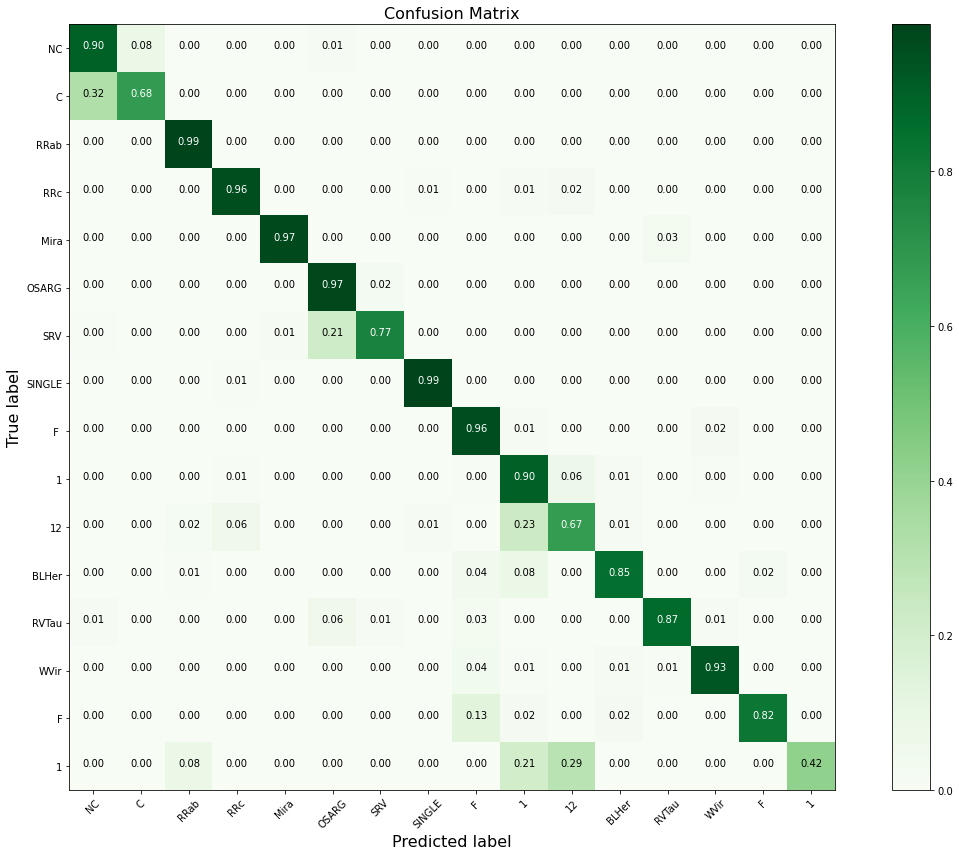

In [ ]:
labels  =  [ 'NC' , 'C',  'RRab' ,
            'RRc','Mira' , 'OSARG' , 'SRV' ,
            'SINGLE' , ' F ' , '1' , '12' , 'BLHer'  ,
            'RVTau' , 'WVir' , 'F' , '1' ]
plot_confusion_matrix(cm = cm , 
                      normalize    = True,
                      target_names = labels ,
                      title  = "Confusion Matrix",
                      file_name = 'NN_DER_CM_CNN_SUB.pdf')

## RNN

###Class

The First Model

In [ ]:
n_h, n_w = X_train[0].shape

In [ ]:
%%time
model = models.Sequential()
model.add(SimpleRNN(3, input_shape =(50,2) , activation='sigmoid', return_sequences=True) )
model.add(SimpleRNN(32,  activation='tanh' )  )
model.add(Dense(32,  activation='relu')  )
model.add(Dense(5,  activation='softmax')  )

model.compile(loss='categorical_crossentropy', optimizer='ADAM', metrics=['categorical_accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 50, 3)             18        
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                1152      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 165       
Total params: 2,391
Trainable params: 2,391
Non-trainable params: 0
_________________________________________________________________
CPU times: user 104 ms, sys: 567 µs, total: 105 ms
Wall time: 107 ms


In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=75, monitor="val_loss"),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5', 
                                       monitor='val_loss',
                                       mode='min',
                                       save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir=f'logs_{model.name}', update_freq=100),
]

In [ ]:
%%time
history = model.fit(X_train, Y_encoded_train, 
                    epochs=100, batch_size=64, 
                    callbacks = my_callbacks,
                    verbose=1, validation_data=(X_validation, Y_encoded_validation))

Epoch 1/100
478/478 [==============================] - 40s 82ms/step - loss: 0.8143 - categorical_accuracy: 0.6596 - val_loss: 0.6548 - val_categorical_accuracy: 0.7065
Epoch 2/100
478/478 [==============================] - 38s 79ms/step - loss: 0.6843 - categorical_accuracy: 0.6974 - val_loss: 0.6926 - val_categorical_accuracy: 0.6868
Epoch 3/100
478/478 [==============================] - 38s 79ms/step - loss: 0.6535 - categorical_accuracy: 0.7102 - val_loss: 0.6309 - val_categorical_accuracy: 0.7283
Epoch 4/100
478/478 [==============================] - 38s 79ms/step - loss: 0.6291 - categorical_accuracy: 0.7470 - val_loss: 0.6787 - val_categorical_accuracy: 0.7347
Epoch 5/100
478/478 [==============================] - 38s 79ms/step - loss: 0.4814 - categorical_accuracy: 0.8242 - val_loss: 0.4313 - val_categorical_accuracy: 0.8441
Epoch 6/100
478/478 [==============================] - 38s 80ms/step - loss: 0.3834 - categorical_accuracy: 0.8584 - val_loss: 0.3617 - val_categorical_acc

In [ ]:
Y_predicted = np.argmax( model.predict(X_test) , axis=1 )
Y_expected = np.argmax( Y_encoded_test , axis=1 )
report = classification_report(Y_expected, Y_predicted)
print(report)
cm = confusion_matrix(Y_expected, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2006
           1       0.98      0.98      0.98      1889
           2       0.98      1.00      0.99      1960
           3       0.99      0.99      0.99       525
           4       0.98      0.98      0.98      2357

    accuracy                           0.98      8737
   macro avg       0.98      0.98      0.98      8737
weighted avg       0.98      0.98      0.98      8737

[[1959    1   33    1   12]
 [   1 1850    0    3   35]
 [   1    0 1957    0    2]
 [   1    5    0  519    0]
 [   0   35    9    2 2311]]


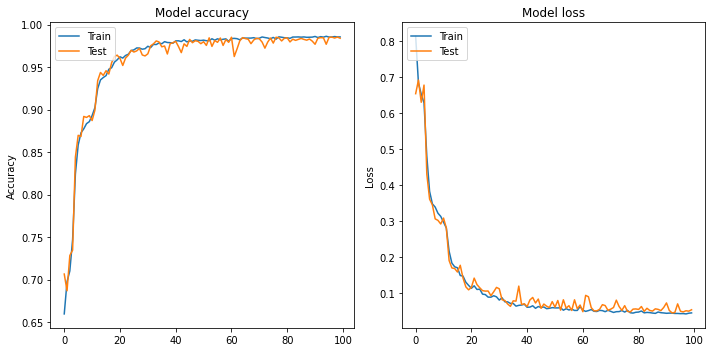

In [ ]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/OGLE4_NN/Models/replacement_first_rnn.h5')

In [ ]:
file_path = '/content/drive/MyDrive/OGLE4_NN/Models/replacement_first_rnn.h5'
first_model = load_model(file_path)

In [ ]:
Y_predicted = np.argmax( model.predict(X_test) , axis=1 )
Y_expected = np.argmax( Y_encoded_test , axis=1 )
report = classification_report(Y_expected, Y_predicted)
print(report)

cm = confusion_matrix(Y_expected, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2006
           1       0.98      0.98      0.98      1889
           2       0.98      1.00      0.99      1960
           3       0.99      0.99      0.99       525
           4       0.98      0.98      0.98      2357

    accuracy                           0.98      8737
   macro avg       0.98      0.98      0.98      8737
weighted avg       0.98      0.98      0.98      8737

[[1959    1   33    1   12]
 [   1 1850    0    3   35]
 [   1    0 1957    0    2]
 [   1    5    0  519    0]
 [   0   35    9    2 2311]]


The Second Model

In [ ]:
%%time
model = models.Sequential()
model.add(SimpleRNN(3, input_shape =(50,2) , activation='sigmoid', return_sequences=True) )
model.add(SimpleRNN(32,  activation='tanh' )  )
model.add(Dense(32,  activation='relu')  )
model.add(Dense(3,  activation='softmax')  )

model.compile(loss='categorical_crossentropy', optimizer='ADAM', metrics=['categorical_accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50, 3)             18        
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                1152      
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99        
Total params: 2,325
Trainable params: 2,325
Non-trainable params: 0
_________________________________________________________________
CPU times: user 501 ms, sys: 3.15 s, total: 3.65 s
Wall time: 7.07 s


In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=300, monitor="val_loss"),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5', 
                                       monitor='val_categorical_accuracy',
                                       mode='max',
                                       save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir=f'logs_{model.name}', update_freq=10),
]

In [ ]:
%%time
history = model.fit(X_train_2,Y_encoded_train_2, 
                    epochs=500, batch_size = 64, 
                    callbacks = my_callbacks,
                    class_weight = class_weight,
                    validation_data = (X_validation_2, Y_encoded_validation_2))


Epoch 1/500
127/127 [==============================] - 15s 83ms/step - loss: 0.8711 - categorical_accuracy: 0.3506 - val_loss: 0.9726 - val_categorical_accuracy: 0.4909
Epoch 2/500
127/127 [==============================] - 9s 72ms/step - loss: 0.7770 - categorical_accuracy: 0.5514 - val_loss: 0.9217 - val_categorical_accuracy: 0.5082
Epoch 3/500
127/127 [==============================] - 10s 77ms/step - loss: 0.7820 - categorical_accuracy: 0.5195 - val_loss: 0.8430 - val_categorical_accuracy: 0.5603
Epoch 4/500
127/127 [==============================] - 9s 73ms/step - loss: 0.7530 - categorical_accuracy: 0.5657 - val_loss: 0.8050 - val_categorical_accuracy: 0.6149
Epoch 5/500
127/127 [==============================] - 9s 74ms/step - loss: 0.7634 - categorical_accuracy: 0.5564 - val_loss: 0.8388 - val_categorical_accuracy: 0.5672
Epoch 6/500
127/127 [==============================] - 9s 74ms/step - loss: 0.7389 - categorical_accuracy: 0.5755 - val_loss: 0.7750 - val_categorical_accurac

In [ ]:
Y_predicted = np.argmax( model.predict(X_test_2) , axis=1 )
Y_expected = np.argmax( Y_encoded_test_2 , axis=1 )
report = classification_report(Y_expected, Y_predicted)
print(report)
cm = confusion_matrix(Y_expected, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1916
           1       0.86      0.90      0.88       372
           2       0.50      0.97      0.66        69

    accuracy                           0.94      2357
   macro avg       0.78      0.94      0.83      2357
weighted avg       0.95      0.94      0.94      2357

[[1802   55   59]
 [  30  335    7]
 [   2    0   67]]


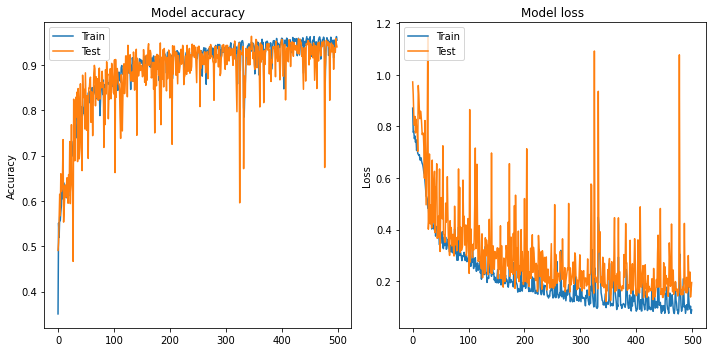

In [ ]:
#Plot training & validation accuracy values
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/OGLE4_NN/Models/replacement_second_rnn.h5')

In [ ]:
file_path = '/content/drive/MyDrive/OGLE4_NN/Models/replacement_second_rnn.h5'
second_model = load_model(file_path)

In [ ]:
Y_predicted = np.argmax( second_model.predict(X_test_2) , axis=1 )
Y_expected = np.argmax( Y_encoded_test_2 , axis=1 )
report = classification_report(Y_expected, Y_predicted)
print(report)
cm = confusion_matrix(Y_expected, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1916
           1       0.86      0.90      0.88       372
           2       0.50      0.97      0.66        69

    accuracy                           0.94      2357
   macro avg       0.78      0.94      0.83      2357
weighted avg       0.95      0.94      0.94      2357

[[1802   55   59]
 [  30  335    7]
 [   2    0   67]]


Using combination of the models to predict the test set we defined at the first.
By model 1, we predict which samples are from cepheid class, then we use model 2 to predict the type of three remained classes.

In [ ]:
#loading the best model

file_path = '/content/drive/MyDrive/OGLE4_NN/Models/replacement_first_rnn.h5'
first_model = load_model(file_path)
file_path = '/content/drive/MyDrive/OGLE4_NN/Models/replacement_second_rnn.h5'
second_model = load_model(file_path)

In [ ]:
%%time
# one hot encode!!

b = np.zeros((int(Y_test.T.size), int(Y_test.T.max()+1)))
b[np.arange(Y_test.T.size), (Y_test.T). astype(int)] = 1
Y_encoded_test_final = b

Y_first = np.argmax( first_model.predict(X_test) , axis=1 ) #prediction of model 1

indexes = []

for i in range(len(Y_first)):
    if Y_first[i] != 4:
        indexes.append(i)
        
X_2 = np.delete(X_test, indexes, axis=0)  # deleting predicted class 0 and 1 samples from test data
Y_2 = np.delete(Y_encoded_test_final, indexes, axis=0)

Y_second = np.argmax( second_model.predict(X_2) , axis=1 ) #prediction of model 2

for i in range(len(Y_second)):
    if Y_second[i]==0:
        Y_second[i] = 4
    elif Y_second[i]==1:
        Y_second[i] = 5
    elif Y_second[i]==2:
        Y_second[i] = 6

ind = []

for i in range(len(Y_first)):
    if Y_first[i] == 4:
        ind.append(i)
        
X_3 = np.delete(X_test, ind, axis=0)
Y_3 = np.delete(Y_first, ind, axis=0)

Y_part_1 = np.delete(Y_encoded_test_final, ind, axis=0)
Y_part_2 = np.delete(Y_encoded_test_final, indexes, axis=0)
Y_true = np.concatenate((Y_part_1, Y_part_2), axis=0)

Y_predicted = np.concatenate((Y_3, Y_second), axis=0)
Y_expected = np.argmax( Y_true , axis=1 )
report = classification_report(Y_expected, Y_predicted)
print(report)
cm = confusion_matrix(Y_expected, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2006
           1       0.98      0.98      0.98      1889
           2       0.98      1.00      0.99      1960
           3       0.99      0.99      0.99       525
           4       0.98      0.93      0.95      1916
           5       0.84      0.88      0.86       372
           6       0.41      0.88      0.56        69

    accuracy                           0.97      8737
   macro avg       0.88      0.95      0.90      8737
weighted avg       0.97      0.97      0.97      8737

[[1959    1   33    1    2    8    2]
 [   1 1850    0    3   12    0   23]
 [   1    0 1957    0    0    2    0]
 [   1    5    0  519    0    0    0]
 [   0   29    1    2 1774   55   55]
 [   0    0    8    0   28  329    7]
 [   0    6    0    0    2    0   61]]
CPU times: user 4.47 s, sys: 121 ms, total: 4.59 s
Wall time: 4.25 s


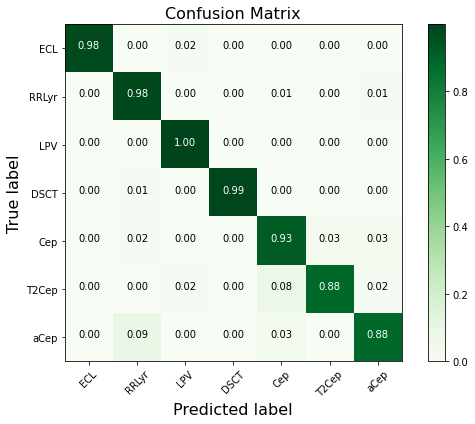

In [ ]:
labels  =  ['ECL', 'RRLyr', 'LPV' , 'DSCT' , 'Cep', 'T2Cep', 'aCep']
plot_confusion_matrix(cm = cm , 
                      normalize    = True,
                      target_names = labels ,
                      title  = "Confusion Matrix",
                      size = [8,6] ,
                      file_name = 'NN_REP_CM_RNN_GP.pdf')

###Sub_class

In [ ]:
 %%time
 data_inf = Data_Prepair(data , binned_number = 50, model = 'defualt'  , normalize = 'true', with_period = 'true'  , channel = 2  ) 

####ECL

In [ ]:
X_sub_train_ECL, X_sub_validation_ECL , X_sub_test_ECL , Y_sub_train_ECL ,Y_sub_validation_ECL ,Y_sub_test_ECL = data_inf.Class_Split(0, 70 , 10 , 20)

,Train,Validation,Test,Total
NC,5735,827,1647,8209
C,1221,156,359,1736
Total,6956,983,2006,9945


In [ ]:
Y_sub_train_ECL = one_hot_encode(Y_sub_train_ECL)
Y_sub_test_ECL = one_hot_encode(Y_sub_test_ECL)
Y_sub_validation_ECL = one_hot_encode(Y_sub_validation_ECL)

In [ ]:
n_h, n_w = X_sub_train_ECL.shape[1] , X_sub_train_ECL.shape[2]

In [ ]:
%%time
model_ECL = models.Sequential()
model_ECL.add(SimpleRNN(3, input_shape =(50,2) , activation='sigmoid', return_sequences=True) )
model_ECL.add(SimpleRNN(32,  activation='tanh')  )
model_ECL.add(Dense(32,  activation='relu')  )
model_ECL.add(Dense(2,  activation='softmax')  )

model_ECL.compile(optimizer='ADAM', 
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

model_ECL.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 50, 3)             18        
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                1152      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 2,292
Trainable params: 2,292
Non-trainable params: 0
_________________________________________________________________
CPU times: user 146 ms, sys: 4.9 ms, total: 151 ms
Wall time: 150 ms


In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=40, monitor="val_loss"),
    tf.keras.callbacks.ModelCheckpoint(filepath='1.1.h5', 
                                       monitor='val_categorical_accuracy',
                                       mode='max',
                                       save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir=f'logs_{model_ECL.name}', update_freq=100),
]

In [ ]:
%%time
history = model_ECL.fit(X_sub_train_ECL,Y_sub_train_ECL, 
                    epochs=60, batch_size =50 ,
                    callbacks = my_callbacks,
                    #class_weight = class_weight,
                    validation_data = (X_sub_validation_ECL, Y_sub_validation_ECL))

Epoch 1/60
140/140 [==============================] - 22s 141ms/step - loss: 0.4254 - categorical_accuracy: 0.8242 - val_loss: 0.3474 - val_categorical_accuracy: 0.8413
Epoch 2/60
140/140 [==============================] - 18s 130ms/step - loss: 0.3685 - categorical_accuracy: 0.8246 - val_loss: 0.3525 - val_categorical_accuracy: 0.8413
Epoch 3/60
140/140 [==============================] - 18s 131ms/step - loss: 0.3634 - categorical_accuracy: 0.8243 - val_loss: 0.3404 - val_categorical_accuracy: 0.8413
Epoch 4/60
140/140 [==============================] - 18s 130ms/step - loss: 0.3628 - categorical_accuracy: 0.8249 - val_loss: 0.3417 - val_categorical_accuracy: 0.8321
Epoch 5/60
140/140 [==============================] - 19s 132ms/step - loss: 0.3587 - categorical_accuracy: 0.8258 - val_loss: 0.3602 - val_categorical_accuracy: 0.8413
Epoch 6/60
140/140 [==============================] - 18s 131ms/step - loss: 0.3547 - categorical_accuracy: 0.8255 - val_loss: 0.3371 - val_categorical_acc

In [ ]:
Y_predicted = np.argmax( model_ECL.predict(X_sub_test_ECL) , axis=1 )
Y_expected = np.argmax( Y_sub_test_ECL , axis=1 )
report = classification_report(Y_expected, Y_predicted)
print(report)

cm = confusion_matrix(Y_expected, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1647
           1       0.65      0.43      0.52       359

    accuracy                           0.86      2006
   macro avg       0.77      0.69      0.72      2006
weighted avg       0.84      0.86      0.85      2006

[[1564   83]
 [ 203  156]]


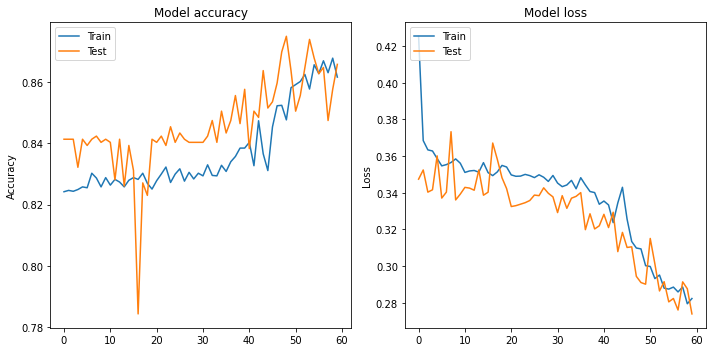

In [ ]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
model_ECL.save('/content/drive/MyDrive/OGLE4_NN/Models/replacement_ECL_rnn.h5')

In [ ]:
file_path = '/content/drive/MyDrive/OGLE4_NN/Models/replacement_ECL_rnn.h5'
model_ECL = load_model(file_path)

In [ ]:
Y_predicted = np.argmax( model_ECL.predict(X_sub_test_ECL) , axis=1 )
Y_expected = np.argmax( Y_sub_test_ECL , axis=1 )
report = classification_report(Y_expected, Y_predicted)
print(report)

cm = confusion_matrix(Y_expected, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1647
           1       0.65      0.43      0.52       359

    accuracy                           0.86      2006
   macro avg       0.77      0.69      0.72      2006
weighted avg       0.84      0.86      0.85      2006

[[1564   83]
 [ 203  156]]


####RRLyr

In [ ]:
X_sub_train_RRL, X_sub_validation_RRL , X_sub_test_RRL , Y_sub_train_RRL ,Y_sub_validation_RRL ,Y_sub_test_RRL = data_inf.Class_Split(1, 70 , 10 , 20)

,Train,Validation,Test
RRab,4999,678,1418
RRc,1654,269,501
Total,6653,947,1919


In [ ]:
Y_sub_train_RRL = one_hot_encode(Y_sub_train_RRL)
Y_sub_test_RRL = one_hot_encode(Y_sub_test_RRL)
Y_sub_validation_RRL = one_hot_encode(Y_sub_validation_RRL)

In [ ]:
n_h, n_w = X_sub_train_RRL.shape[1] , X_sub_train_RRL.shape[2]

In [ ]:
%%time
model_RRL= models.Sequential()
model_RRL.add(SimpleRNN(3, input_shape =(50,2) , activation='sigmoid', return_sequences=True) )
model_RRL.add(SimpleRNN(32,  activation='tanh')  )
model_RRL.add(Dense(32,  activation='relu')  )
model_RRL.add(Dense(2,  activation='softmax')  )

model_RRL.compile(optimizer='ADAM', 
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

model_RRL.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_6 (SimpleRNN)     (None, 50, 3)             18        
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                1152      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 66        
Total params: 2,292
Trainable params: 2,292
Non-trainable params: 0
_________________________________________________________________
CPU times: user 144 ms, sys: 547 µs, total: 145 ms
Wall time: 144 ms


In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=80, monitor="val_loss"),
    tf.keras.callbacks.ModelCheckpoint(filepath='1.1.h5', 
                                       monitor='val_categorical_accuracy',
                                       mode='max',
                                       save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir=f'logs_{model_RRL.name}', update_freq=100),
]

In [ ]:
%%time
history = model_RRL.fit( X_sub_train_RRL,Y_sub_train_RRL, 
                    epochs=7, batch_size =100 ,
                    callbacks = my_callbacks,
                    #class_weight = class_weight,
                    validation_data = (X_sub_validation_RRL , Y_sub_validation_RRL))

Epoch 1/7
67/67 [==============================] - 12s 156ms/step - loss: 0.5345 - categorical_accuracy: 0.7607 - val_loss: 0.7141 - val_categorical_accuracy: 0.7159
Epoch 2/7
67/67 [==============================] - 9s 136ms/step - loss: 0.3523 - categorical_accuracy: 0.8798 - val_loss: 0.1915 - val_categorical_accuracy: 0.9345
Epoch 3/7
67/67 [==============================] - 9s 137ms/step - loss: 0.0867 - categorical_accuracy: 0.9741 - val_loss: 0.0370 - val_categorical_accuracy: 0.9884
Epoch 4/7
67/67 [==============================] - 9s 135ms/step - loss: 0.1133 - categorical_accuracy: 0.9588 - val_loss: 0.1037 - val_categorical_accuracy: 0.9694
Epoch 5/7
67/67 [==============================] - 9s 138ms/step - loss: 0.0402 - categorical_accuracy: 0.9881 - val_loss: 0.0383 - val_categorical_accuracy: 0.9852
Epoch 6/7
67/67 [==============================] - 9s 139ms/step - loss: 0.0299 - categorical_accuracy: 0.9901 - val_loss: 0.0247 - val_categorical_accuracy: 0.9926
Epoch 7/7

In [ ]:
Y_predicted = np.argmax( model_RRL.predict(X_sub_test_RRL) , axis=1 )
Y_expected = np.argmax( Y_sub_test_RRL , axis=1 )
report = classification_report(Y_expected, Y_predicted)
print(report)

cm = confusion_matrix(Y_expected, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1418
           1       0.99      1.00      0.99       501

    accuracy                           1.00      1919
   macro avg       1.00      1.00      1.00      1919
weighted avg       1.00      1.00      1.00      1919

[[1414    4]
 [   2  499]]


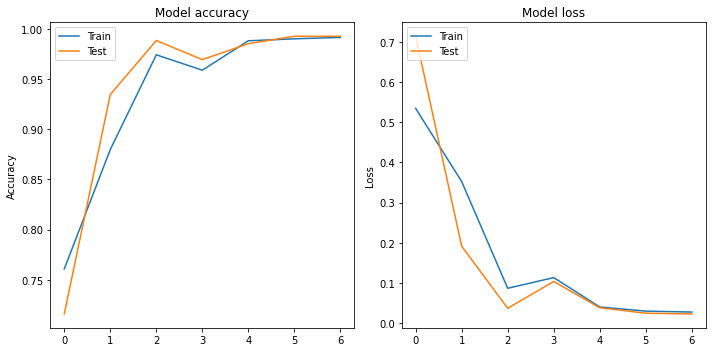

In [ ]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
model_RRL.save('/content/drive/MyDrive/OGLE4_NN/Models/replacement_RRL_rnn.h5')

In [ ]:
file_path = '/content/drive/MyDrive/OGLE4_NN/Models/replacement_RRL_rnn.h5'
model_RRL = load_model(file_path)

In [ ]:
Y_predicted = np.argmax( model_RRL.predict(X_sub_test_RRL) , axis=1 )
Y_expected = np.argmax( Y_sub_test_RRL , axis=1 )
report = classification_report(Y_expected, Y_predicted)
print(report)

cm = confusion_matrix(Y_expected, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1418
           1       0.99      1.00      0.99       501

    accuracy                           1.00      1919
   macro avg       1.00      1.00      1.00      1919
weighted avg       1.00      1.00      1.00      1919

[[1414    4]
 [   2  499]]


####LPV

In [ ]:
X_sub_train_LPV, X_sub_validation_LPV , X_sub_test_LPV , Y_sub_train_LPV ,Y_sub_validation_LPV ,Y_sub_test_LPV = data_inf.Class_Split(2, 70 , 10 , 20)

,Train,Validation,Test,Total
Mira,137,15,36,188
OSARG,5929,845,1681,8455
SRV,878,150,243,1271
Total,6944,1010,1960,9914


In [ ]:
Y_sub_train_LPV = one_hot_encode(Y_sub_train_LPV)
Y_sub_test_LPV = one_hot_encode(Y_sub_test_LPV)
Y_sub_validation_LPV = one_hot_encode(Y_sub_validation_LPV)

In [ ]:
n_h, n_w = X_sub_train_LPV.shape[1] , X_sub_train_LPV.shape[2]

In [ ]:
%%time
model_LPV= models.Sequential()
model_LPV.add(SimpleRNN(3, input_shape =(50,2) , activation='sigmoid', return_sequences=True) )
model_LPV.add(SimpleRNN(32,  activation='tanh')  )
model_LPV.add(Dense(32,  activation='relu')  )
model_LPV.add(Dense(3,  activation='softmax')  )

model_LPV.compile(optimizer='ADAM', 
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

model_LPV.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 50, 3)             18        
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                1152      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 2,325
Trainable params: 2,325
Non-trainable params: 0
_________________________________________________________________
CPU times: user 144 ms, sys: 820 µs, total: 145 ms
Wall time: 144 ms


In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=80, monitor="val_loss"),
    tf.keras.callbacks.ModelCheckpoint(filepath='1.1.h5', 
                                       monitor='val_categorical_accuracy',
                                       mode='max',
                                       save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir=f'logs_{model_LPV.name}', update_freq=100),
]

In [ ]:
%%time
history = model_LPV.fit( X_sub_train_LPV,Y_sub_train_LPV, 
                    epochs=100, batch_size =100 ,
                    callbacks = my_callbacks,
                    validation_data = (X_sub_validation_LPV , Y_sub_validation_LPV))

Epoch 1/120
70/70 [==============================] - 12s 153ms/step - loss: 0.5243 - categorical_accuracy: 0.8538 - val_loss: 0.4956 - val_categorical_accuracy: 0.8366
Epoch 2/120
70/70 [==============================] - 9s 132ms/step - loss: 0.4589 - categorical_accuracy: 0.8538 - val_loss: 0.4002 - val_categorical_accuracy: 0.8366
Epoch 3/120
70/70 [==============================] - 9s 133ms/step - loss: 0.3025 - categorical_accuracy: 0.8455 - val_loss: 0.3032 - val_categorical_accuracy: 0.8366
Epoch 4/120
70/70 [==============================] - 9s 133ms/step - loss: 0.2837 - categorical_accuracy: 0.8412 - val_loss: 0.2934 - val_categorical_accuracy: 0.8257
Epoch 5/120
70/70 [==============================] - 9s 134ms/step - loss: 0.2826 - categorical_accuracy: 0.8486 - val_loss: 0.2971 - val_categorical_accuracy: 0.8366
Epoch 6/120
70/70 [==============================] - 9s 128ms/step - loss: 0.2814 - categorical_accuracy: 0.8383 - val_loss: 0.2961 - val_categorical_accuracy: 0.83

In [ ]:
Y_predicted = np.argmax( model_LPV.predict(X_sub_test_LPV) , axis=1 )
Y_expected = np.argmax( Y_sub_test_LPV , axis=1 )
report = classification_report(Y_expected, Y_predicted)
print(report)

cm = confusion_matrix(Y_expected, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       0.97      0.96      0.97      1681
           2       0.74      0.79      0.76       243

    accuracy                           0.94      1960
   macro avg       0.89      0.92      0.90      1960
weighted avg       0.94      0.94      0.94      1960

[[  36    0    0]
 [   0 1615   66]
 [   2   50  191]]


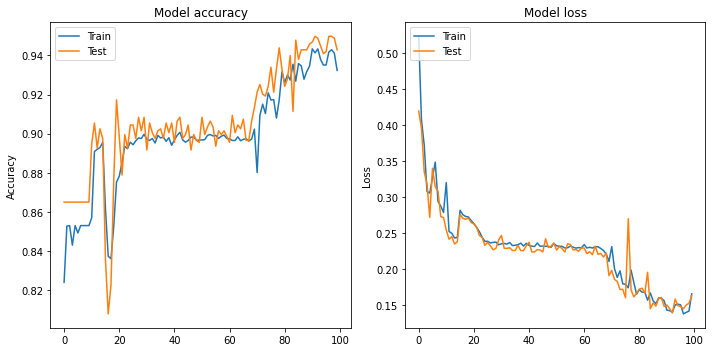

In [ ]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
model_LPV.save('/content/drive/MyDrive/OGLE4_NN/Models/replacement_LPV_rnn.h5')

In [ ]:
file_path = '/content/drive/MyDrive/OGLE4_NN/Models/replacement_LPV_rnn.h5'
model_LPV = load_model(file_path)

In [ ]:
Y_predicted = np.argmax( model_LPV.predict(X_sub_test_LPV) , axis=1 )
Y_expected = np.argmax( Y_sub_test_LPV , axis=1 )
report = classification_report(Y_expected, Y_predicted)
print(report)

cm = confusion_matrix(Y_expected, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        41
           1       0.97      0.96      0.97      1692
           2       0.77      0.80      0.79       267

    accuracy                           0.94      2000
   macro avg       0.89      0.91      0.90      2000
weighted avg       0.94      0.94      0.94      2000

[[  40    0    1]
 [   0 1630   62]
 [   3   50  214]]


####CEP

In [ ]:
X_sub_train_CEP, X_sub_validation_CEP , X_sub_test_CEP , Y_sub_train_CEP ,Y_sub_validation_CEP ,Y_sub_test_CEP = data_inf.Class_Split(4, 70 , 10 , 20)

,Train,Validation,Test,Total
F,3701,537,1077,5315
1,2464,325,680,3469
12,459,76,159,694
Total,6624,938,1916,9478


In [ ]:
Y_sub_train_CEP = one_hot_encode(Y_sub_train_CEP)
Y_sub_test_CEP = one_hot_encode(Y_sub_test_CEP)
Y_sub_validation_CEP = one_hot_encode(Y_sub_validation_CEP)

In [ ]:
n_h, n_w = X_sub_train_CEP.shape[1] , X_sub_train_CEP.shape[2]

In [ ]:
%%time
model_CEP= models.Sequential()
model_CEP.add(SimpleRNN(3, input_shape =(50,2) , activation='sigmoid', return_sequences=True) )
model_CEP.add(SimpleRNN(32,  activation='tanh')  )
model_CEP.add(Dense(32,  activation='relu')  )
model_CEP.add(Dense(3,  activation='softmax')  )

model_CEP.compile(optimizer='ADAM', 
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

model_CEP.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_6 (SimpleRNN)     (None, 50, 3)             18        
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                1152      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 99        
Total params: 2,325
Trainable params: 2,325
Non-trainable params: 0
_________________________________________________________________
CPU times: user 154 ms, sys: 2.75 ms, total: 157 ms
Wall time: 155 ms


In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=60, monitor="val_loss"),
    tf.keras.callbacks.ModelCheckpoint(filepath='1.1.h5', 
                                       monitor='val_categorical_accuracy',
                                       mode='max',
                                       save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir=f'logs_{model_CEP.name}', update_freq=100),
]

In [ ]:
%%time
history = model_CEP.fit( X_sub_train_CEP,Y_sub_train_CEP, 
                    epochs=70, batch_size =100 ,
                    callbacks = my_callbacks,
                    validation_data = (X_sub_validation_CEP, Y_sub_validation_CEP))

Epoch 1/90
67/67 [==============================] - 12s 159ms/step - loss: 0.8133 - categorical_accuracy: 0.6196 - val_loss: 0.7745 - val_categorical_accuracy: 0.6194
Epoch 2/90
67/67 [==============================] - 9s 139ms/step - loss: 0.6812 - categorical_accuracy: 0.6510 - val_loss: 0.6414 - val_categorical_accuracy: 0.6237
Epoch 3/90
67/67 [==============================] - 9s 140ms/step - loss: 0.6278 - categorical_accuracy: 0.6819 - val_loss: 0.6678 - val_categorical_accuracy: 0.6620
Epoch 4/90
67/67 [==============================] - 9s 137ms/step - loss: 0.6003 - categorical_accuracy: 0.7103 - val_loss: 0.6023 - val_categorical_accuracy: 0.6748
Epoch 5/90
67/67 [==============================] - 9s 138ms/step - loss: 0.5662 - categorical_accuracy: 0.7717 - val_loss: 0.5884 - val_categorical_accuracy: 0.7783
Epoch 6/90
67/67 [==============================] - 9s 139ms/step - loss: 0.4499 - categorical_accuracy: 0.8119 - val_loss: 0.3582 - val_categorical_accuracy: 0.8486
Epo

In [ ]:
Y_predicted = np.argmax( model_CEP.predict(X_sub_test_CEP) , axis=1 )
Y_expected = np.argmax( Y_sub_test_CEP , axis=1 )
report = classification_report(Y_expected, Y_predicted)
print(report)

cm = confusion_matrix(Y_expected, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1077
           1       0.84      0.87      0.86       680
           2       0.62      0.38      0.47       159

    accuracy                           0.89      1916
   macro avg       0.81      0.75      0.77      1916
weighted avg       0.89      0.89      0.89      1916

[[1061   16    0]
 [  51  592   37]
 [   4   94   61]]


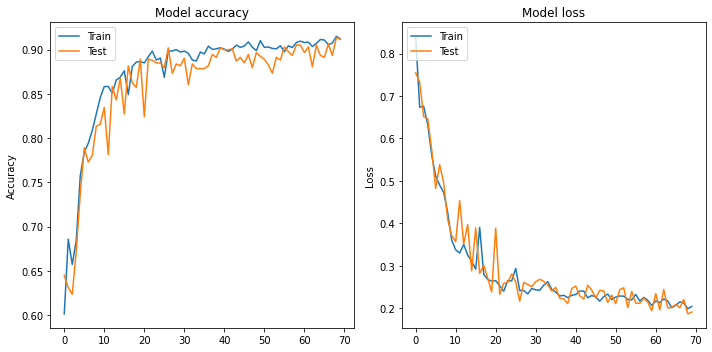

In [ ]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
model_CEP.save('/content/drive/MyDrive/OGLE4_NN/Models/replacement_CEP_rnn.h5')

In [ ]:
file_path = '/content/drive/MyDrive/OGLE4_NN/Models/replacement_CEP_rnn.h5'
model_CEP= load_model(file_path)

In [ ]:
Y_predicted = np.argmax( model_CEP.predict(X_sub_test_CEP) , axis=1 )
Y_expected = np.argmax( Y_sub_test_CEP , axis=1 )
report = classification_report(Y_expected, Y_predicted)
print(report)

cm = confusion_matrix(Y_expected, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1077
           1       0.83      0.93      0.88       680
           2       0.70      0.39      0.50       159

    accuracy                           0.91      1916
   macro avg       0.84      0.76      0.79      1916
weighted avg       0.91      0.91      0.90      1916

[[1046   31    0]
 [  19  634   27]
 [   0   97   62]]


####T2CEP

In [ ]:
X_sub_train_T2CEP, X_sub_validation_T2CEP , X_sub_test_T2CEP , Y_sub_train_T2CEP ,Y_sub_validation_T2CEP ,Y_sub_test_T2CEP = data_inf.Class_Split(5, 70 , 10 , 20)

,Train,Validation,Test
BLHer,513,89,145
RVTau,246,31,69
WVir,489,75,126
Total,1248,195,340


In [ ]:
Y_sub_train_T2CEP = one_hot_encode(Y_sub_train_T2CEP)
Y_sub_test_T2CEP = one_hot_encode(Y_sub_test_T2CEP)
Y_sub_validation_T2CEP = one_hot_encode(Y_sub_validation_T2CEP)

In [ ]:
n_h, n_w = X_sub_train_T2CEP.shape[1] , X_sub_train_T2CEP.shape[2]

In [ ]:
%%time
model_T2CEP= models.Sequential()
model_T2CEP.add(SimpleRNN(3, input_shape =(50,2) , activation='sigmoid', return_sequences=True) )
model_T2CEP.add(SimpleRNN(32,  activation='tanh')  )
model_T2CEP.add(Dense(32,  activation='relu')  )
model_T2CEP.add(Dense(3,  activation='softmax')  )

model_T2CEP.compile(optimizer='ADAM', 
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

model_T2CEP.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_12 (SimpleRNN)    (None, 50, 3)             18        
_________________________________________________________________
simple_rnn_13 (SimpleRNN)    (None, 32)                1152      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 99        
Total params: 2,325
Trainable params: 2,325
Non-trainable params: 0
_________________________________________________________________
CPU times: user 154 ms, sys: 2.6 ms, total: 157 ms
Wall time: 156 ms


In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=80, monitor="val_loss"),
    tf.keras.callbacks.ModelCheckpoint(filepath='1.1.h5', 
                                       monitor='val_categorical_accuracy',
                                       mode='max',
                                       save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir=f'logs_{model_T2CEP.name}', update_freq=100),
]

In [ ]:
%%time
history = model_T2CEP.fit( X_sub_train_T2CEP,Y_sub_train_T2CEP, 
                    epochs=100, batch_size =40 ,
                    callbacks = my_callbacks,
                    #class_weight = class_weight,
                    validation_data = (X_sub_validation_T2CEP, Y_sub_validation_T2CEP))

Epoch 1/100
32/32 [==============================] - 8s 182ms/step - loss: 1.0067 - categorical_accuracy: 0.5753 - val_loss: 0.8041 - val_categorical_accuracy: 0.7744
Epoch 2/100
32/32 [==============================] - 4s 136ms/step - loss: 0.5673 - categorical_accuracy: 0.7829 - val_loss: 0.4386 - val_categorical_accuracy: 0.8205
Epoch 3/100
32/32 [==============================] - 4s 137ms/step - loss: 1.2793 - categorical_accuracy: 0.4824 - val_loss: 1.0339 - val_categorical_accuracy: 0.3846
Epoch 4/100
32/32 [==============================] - 4s 134ms/step - loss: 1.0280 - categorical_accuracy: 0.6154 - val_loss: 0.9742 - val_categorical_accuracy: 0.8256
Epoch 5/100
32/32 [==============================] - 5s 142ms/step - loss: 0.9716 - categorical_accuracy: 0.7324 - val_loss: 0.8886 - val_categorical_accuracy: 0.8359
Epoch 6/100
32/32 [==============================] - 4s 132ms/step - loss: 0.8493 - categorical_accuracy: 0.7829 - val_loss: 0.6953 - val_categorical_accuracy: 0.835

In [ ]:
Y_predicted = np.argmax( model_T2CEP.predict(X_sub_test_T2CEP) , axis=1 )
Y_expected = np.argmax( Y_sub_test_T2CEP , axis=1 )
report = classification_report(Y_expected, Y_predicted)
print(report)

cm = confusion_matrix(Y_expected, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       145
           1       1.00      1.00      1.00        69
           2       1.00      0.98      0.99       126

    accuracy                           0.99       340
   macro avg       1.00      0.99      1.00       340
weighted avg       0.99      0.99      0.99       340

[[145   0   0]
 [  0  69   0]
 [  2   0 124]]


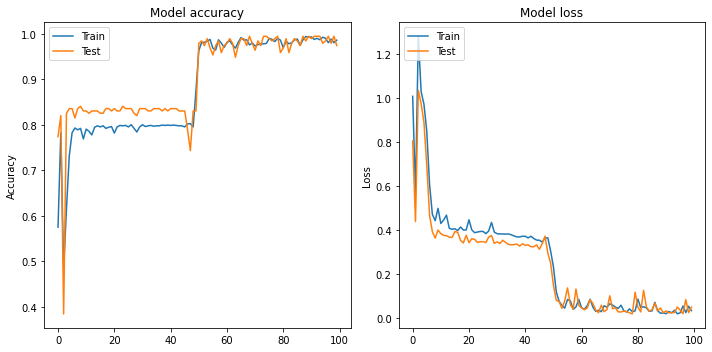

In [ ]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
model_T2CEP.save('/content/drive/MyDrive/OGLE4_NN/Models/replacement_T2CEP_rnn.h5')

In [ ]:
file_path = '/content/drive/MyDrive/OGLE4_NN/Models/replacement_T2CEP_rnn.h5'
model_T2CEP= load_model(file_path)

In [ ]:
Y_predicted = np.argmax( model_T2CEP.predict(X_sub_test_T2CEP) , axis=1 )
Y_expected = np.argmax( Y_sub_test_T2CEP , axis=1 )
report = classification_report(Y_expected, Y_predicted)
print(report)

cm = confusion_matrix(Y_expected, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       145
           1       1.00      1.00      1.00        69
           2       1.00      0.98      0.99       126

    accuracy                           0.99       340
   macro avg       1.00      0.99      1.00       340
weighted avg       0.99      0.99      0.99       340

[[145   0   0]
 [  0  69   0]
 [  2   0 124]]


####ACEP

In [ ]:
X_sub_train_ACEP, X_sub_validation_ACEP , X_sub_test_ACEP , Y_sub_train_ACEP ,Y_sub_validation_ACEP ,Y_sub_test_ACEP = data_inf.Class_Split(6, 70 , 10 , 20)

,Train,Validation,Test
F,177,25,44
1,83,12,25
Total,260,37,69


In [ ]:
Y_sub_train_ACEP = one_hot_encode(Y_sub_train_ACEP)
Y_sub_test_ACEP = one_hot_encode(Y_sub_test_ACEP)
Y_sub_validation_ACEP = one_hot_encode(Y_sub_validation_ACEP)

In [ ]:
n_h, n_w = X_sub_train_ACEP.shape[1] , X_sub_train_ACEP.shape[2]

In [ ]:
%%time
model_ACEP= models.Sequential()
model_ACEP.add(SimpleRNN(3, input_shape =(50,2) , activation='sigmoid', return_sequences=True) )
model_ACEP.add(SimpleRNN(32,  activation='tanh')  )
model_ACEP.add(Dense(32,  activation='relu')  )
model_ACEP.add(Dense(2,  activation='softmax')  )

model_ACEP.compile(optimizer='ADAM', 
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

model_ACEP.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_14 (SimpleRNN)    (None, 50, 3)             18        
_________________________________________________________________
simple_rnn_15 (SimpleRNN)    (None, 32)                1152      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 66        
Total params: 2,292
Trainable params: 2,292
Non-trainable params: 0
_________________________________________________________________
CPU times: user 168 ms, sys: 3.9 ms, total: 172 ms
Wall time: 177 ms


In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=80, monitor="val_loss"),
    tf.keras.callbacks.ModelCheckpoint(filepath='1.1.h5', 
                                       monitor='val_categorical_accuracy',
                                       mode='max',
                                       save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir=f'logs_{model_ACEP.name}', update_freq=100),
]

In [ ]:
%%time
history = model_ACEP.fit( X_sub_train_ACEP,Y_sub_train_ACEP, 
                    epochs=100, batch_size = 16 ,
                    callbacks = my_callbacks,
                    #class_weight = class_weight,
                    validation_data = (X_sub_validation_ACEP, Y_sub_validation_ACEP))

Epoch 1/100
17/17 [==============================] - 6s 232ms/step - loss: 0.6172 - categorical_accuracy: 0.6808 - val_loss: 0.5557 - val_categorical_accuracy: 0.6757
Epoch 2/100
17/17 [==============================] - 2s 144ms/step - loss: 0.5500 - categorical_accuracy: 0.7308 - val_loss: 0.4141 - val_categorical_accuracy: 0.8919
Epoch 3/100
17/17 [==============================] - 2s 143ms/step - loss: 0.5333 - categorical_accuracy: 0.7154 - val_loss: 0.4510 - val_categorical_accuracy: 0.7838
Epoch 4/100
17/17 [==============================] - 2s 143ms/step - loss: 0.5240 - categorical_accuracy: 0.7731 - val_loss: 0.3573 - val_categorical_accuracy: 0.8919
Epoch 5/100
17/17 [==============================] - 2s 140ms/step - loss: 0.4262 - categorical_accuracy: 0.8462 - val_loss: 0.4884 - val_categorical_accuracy: 0.7297
Epoch 6/100
17/17 [==============================] - 2s 145ms/step - loss: 0.5691 - categorical_accuracy: 0.6885 - val_loss: 0.4890 - val_categorical_accuracy: 0.783

In [ ]:
Y_predicted = np.argmax( model_ACEP.predict(X_sub_test_ACEP) , axis=1 )
Y_expected = np.argmax( Y_sub_test_ACEP , axis=1 )
report = classification_report(Y_expected, Y_predicted)
print(report)

cm = confusion_matrix(Y_expected, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        44
           1       1.00      0.92      0.96        25

    accuracy                           0.97        69
   macro avg       0.98      0.96      0.97        69
weighted avg       0.97      0.97      0.97        69

[[44  0]
 [ 2 23]]


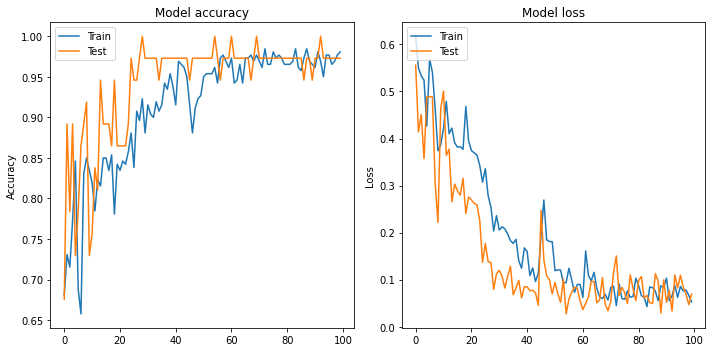

In [ ]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
model_ACEP.save('/content/drive/MyDrive/OGLE4_NN/Models/replacement_ACEP_rnn.h5')

In [ ]:
file_path = '/content/drive/MyDrive/OGLE4_NN/Models/replacement_ACEP_rnn.h5'
model_ACEP= load_model(file_path)

In [ ]:
Y_predicted = np.argmax( model_ACEP.predict(X_sub_test_ACEP) , axis=1 )
Y_expected = np.argmax( Y_sub_test_ACEP , axis=1 )
report = classification_report(Y_expected, Y_predicted)
print(report)

cm = confusion_matrix(Y_expected, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        44
           1       1.00      0.92      0.96        25

    accuracy                           0.97        69
   macro avg       0.98      0.96      0.97        69
weighted avg       0.97      0.97      0.97        69

[[44  0]
 [ 2 23]]


###ALL_TOGETHER

In [ ]:
#CLASS
#loading the best model

file_path = '/content/drive/MyDrive/OGLE4_NN/Models/replacement_first_rnn.h5'
first_model = load_model(file_path)
file_path = '/content/drive/MyDrive/OGLE4_NN/Models/replacement_second_rnn.h5'
second_model = load_model(file_path)

In [ ]:
#SUB_CLASS
#loading the best model

file_path = '/content/drive/MyDrive/OGLE4_NN/Models/replacement_ECL_rnn.h5'
model_ECL = load_model(file_path)
file_path = '/content/drive/MyDrive/OGLE4_NN/Models/replacement_RRL_rnn.h5'
model_RRL = load_model(file_path)
file_path = '/content/drive/MyDrive/OGLE4_NN/Models/replacement_LPV_rnn.h5'
model_LPV = load_model(file_path)
file_path = '/content/drive/MyDrive/OGLE4_NN/Models/replacement_CEP_rnn.h5'
model_CEP= load_model(file_path)
file_path = '/content/drive/MyDrive/OGLE4_NN/Models/replacement_T2CEP_rnn.h5'
model_T2CEP= load_model(file_path)
file_path = '/content/drive/MyDrive/OGLE4_NN/Models/replacement_ACEP_rnn.h5'
model_ACEP= load_model(file_path)

In [ ]:
%%time
data_inf =  Data_Prepair(data , binned_number = 50 , model = 'defualt'  , normalize = 'true', with_period = 'true'  , channel = 2  ) 

CPU times: user 13min 44s, sys: 13.3 s, total: 13min 57s
Wall time: 13min 49s


In [ ]:
%%time
X_gen_train, X_gen_validation , X_gen_test , Y_gen_train ,Y_gen_validation ,Y_gen_test = data_inf.Class_Split(-2, 70 , 10 , 20)

,Train,Validation,Test,Total
NC,5735,827,1647,8209
C,1221,156,359,1736
RRab,5026,690,1379,7095
RRc,1655,259,510,2424
Mira,137,15,36,188
OSARG,5929,845,1681,8455
SRV,878,150,243,1271
SINGLE,1880,273,525,2678
F,3701,537,1077,5315
1,2464,325,680,3469


CPU times: user 597 ms, sys: 956 µs, total: 598 ms
Wall time: 600 ms


In [ ]:
%%time
Y_first = np.argmax( first_model.predict(X_gen_test) , axis=1 ) #prediction of model 1

indexes_0 = []
indexes_1 = []
indexes_2 = []
indexes_3 = []
indexes_4 = []

for i in range(len(Y_first)) :
    if  Y_first[i] == 0:
        indexes_0.append(i)
    if  Y_first[i] == 1:
        indexes_1.append(i)
    if  Y_first[i] == 2:
        indexes_2.append(i)
    if  Y_first[i] == 3: 
        indexes_3.append(i)
    if  Y_first[i] == 4:
        indexes_4.append(i)
        

X_0 = X_gen_test[indexes_0]  #==>ECL
Y_E_0 = Y_gen_test [indexes_0]

X_1 = X_gen_test[indexes_1]  #==>RRL
Y_E_1 = Y_gen_test [indexes_1]

X_2 = X_gen_test[indexes_2]  #==>DSCT
Y_E_2 = Y_gen_test [indexes_2]

X_3 = X_gen_test[indexes_3]  #==>LPV
Y_E_3 = Y_gen_test [indexes_3]

X_4 = X_gen_test[indexes_4]  #==> Cep - T2Cep - aCep
Y_E_4 = Y_gen_test [indexes_4]

Y_second = np.argmax( second_model.predict(X_4 ) , axis=1 ) #prediction of model 2

indexes_4_0 = []
indexes_4_1 = []
indexes_4_2 = [] 

for i in range(len(Y_second)):
    if Y_second[i] ==0:
        indexes_4_0.append(i)
    if Y_second[i] == 1:
        indexes_4_1.append(i)
    if Y_second[i] == 2:
        indexes_4_2.append(i)

X_4_0 = X_4[indexes_4_0]  #==> Cep
Y_E_4_0 = Y_E_4 [indexes_4_0]
X_4_1 = X_4[indexes_4_1]  #==> T2Cep
Y_E_4_1 = Y_E_4 [indexes_4_1]
X_4_2 = X_4[indexes_4_2]  #==> aCep
Y_E_4_2 = Y_E_4 [indexes_4_2]


X_4 = X_4_0  #==> Cep
Y_E_4 = Y_E_4_0

X_5 = X_4_1  #==> T2Cep
Y_E_5 = Y_E_4_1

X_6 = X_4_2 #==> aCep
Y_E_6 = Y_E_4_2

Y_0 = np.argmax( model_ECL.predict(X_0) , axis=1 ) #prediction of model ECL

indexes_0_0 = []
indexes_0_1 = []

for i in range(len(Y_0)) :
    if  Y_0[i] == 0:
        indexes_0_0.append(i)
    if  Y_0[i] == 1:
        indexes_0_1.append(i)

Y_0_0 = Y_0[indexes_0_0]
Y_E_0_0 =Y_E_0[indexes_0_0]

Y_0_1 = Y_0[indexes_0_1]
Y_E_0_1 =Y_E_0[indexes_0_1]


Y_1 = np.argmax( model_RRL.predict(X_1) , axis=1 ) #prediction of model RRL

indexes_1_0 = []
indexes_1_1 = []

for i in range(len(Y_1)) :
    if  Y_1[i] == 0:
        indexes_1_0.append(i)
    if  Y_1[i] == 1:
        indexes_1_1.append(i)

Y_1_0 = Y_1[indexes_1_0]
Y_E_1_0 =Y_E_1[indexes_1_0]

Y_1_1 = Y_1[indexes_1_1]
Y_E_1_1 =Y_E_1[indexes_1_1]


Y_2 = np.argmax( model_LPV.predict(X_2) , axis=1 ) #prediction of model LPV

indexes_2_0 = []
indexes_2_1 = []
indexes_2_2 = []

for i in range(len(Y_2)) :
    if  Y_2[i] == 0:
        indexes_2_0.append(i)
    if  Y_2[i] == 1:
        indexes_2_1.append(i)
    if  Y_2[i] == 2:
        indexes_2_2.append(i)

Y_2_0 = Y_2[indexes_2_0]
Y_E_2_0 =Y_E_2[indexes_2_0]

Y_2_1 = Y_2[indexes_2_1]
Y_E_2_1 =Y_E_2[indexes_2_1]

Y_2_2 = Y_2[indexes_2_2]
Y_E_2_2 =Y_E_2[indexes_2_2]

Y_3_0 = Y_first [indexes_3]  #prediction of model DSCT
Y_E_3_0 = Y_E_3

Y_4 = np.argmax( model_CEP.predict(X_4) , axis=1 ) #prediction of model CEP

indexes_4_0 = [ ]
indexes_4_1 = [ ]
indexes_4_2 = [ ]

for i in range(len(Y_4)) :
    if  Y_4[i] == 0:
        indexes_4_0.append(i)
    if  Y_4[i] == 1:
        indexes_4_1.append(i)
    if  Y_4[i] == 2:
        indexes_4_2.append(i)

Y_4_0 = Y_4[indexes_4_0]
Y_E_4_0 =Y_E_4[indexes_4_0]

Y_4_1 = Y_4[indexes_4_1]
Y_E_4_1 =Y_E_4[indexes_4_1]

Y_4_2 = Y_4[indexes_4_2]
Y_E_4_2 =Y_E_4[indexes_4_2]

Y_5 = np.argmax( model_T2CEP.predict(X_5) , axis=1 ) #prediction of model T2CEP

indexes_5_0 = []
indexes_5_1 = []
indexes_5_2 = []

for i in range(len(Y_5)) :
    if  Y_5[i] == 0:
        indexes_5_0.append(i)
    if  Y_5[i] == 1:
        indexes_5_1.append(i)
    if  Y_5[i] == 2:
        indexes_5_2.append(i)

Y_5_0 = Y_5[indexes_5_0]
Y_E_5_0 =Y_E_5[indexes_5_0]

Y_5_1 = Y_5[indexes_5_1]
Y_E_5_1 =Y_E_5[indexes_5_1]

Y_5_2 = Y_5[indexes_5_2]
Y_E_5_2 =Y_E_5[indexes_5_2]

Y_6 = np.argmax( model_ACEP.predict(X_6) , axis=1 ) #prediction of model ACEP

indexes_6_0 = [ ]
indexes_6_1 = [ ]

for i in range(len(Y_6)) :
    if  Y_6[i] == 0:
        indexes_6_0.append(i)
    if  Y_6[i] == 1:
        indexes_6_1.append(i)

Y_6_0 = Y_6[indexes_6_0]
Y_E_6_0 =Y_E_6[indexes_6_0]

Y_6_1 = Y_6[indexes_6_1]
Y_E_6_1 =Y_E_6[indexes_6_1]

for i in range(len(Y_0_0)):
     Y_0_0[i] = 0
for i in range(len(Y_0_1)):
     Y_0_1[i] = 1
for i in range(len(Y_1_0)):
     Y_1_0[i] = 2
for i in range(len(Y_1_1)):
     Y_1_1[i] = 3
for i in range(len(Y_2_0)):
     Y_2_0[i] = 4
for i in range(len(Y_2_1)):
     Y_2_1[i] = 5
for i in range(len(Y_2_2)):
     Y_2_2[i] = 6
for i in range(len(Y_3_0)):
     Y_3_0[i] = 7
for i in range(len(Y_4_0)):
     Y_4_0[i] = 8
for i in range(len(Y_4_1)):
     Y_4_1[i] = 9
for i in range(len(Y_4_2)):
     Y_4_2[i] = 10
for i in range(len(Y_5_0)):
     Y_5_0[i] = 11
for i in range(len(Y_5_1)):
     Y_5_1[i] = 12
for i in range(len(Y_5_2)):
     Y_5_2[i] = 13
for i in range(len(Y_6_0)):
     Y_6_0[i] = 14
for i in range(len(Y_6_1)):
     Y_6_1[i] = 15



Y_expected = np.concatenate(( Y_E_0_0 ,Y_E_0_1
                                ,Y_E_1_0 ,Y_E_1_1
                                ,Y_E_2_0 ,Y_E_2_1 , Y_E_2_2
                                ,Y_E_3_0
                                ,Y_E_4_0 ,Y_E_4_1,Y_E_4_2
                                ,Y_E_5_0 ,Y_E_5_1 , Y_E_5_2
                                ,Y_E_6_0 ,Y_E_6_1), axis=0)

Y_predicted =np.concatenate(( Y_0_0 ,Y_0_1
                                ,Y_1_0 ,Y_1_1
                                ,Y_2_0 ,Y_2_1 , Y_2_2
                                ,Y_3_0
                                ,Y_4_0 ,Y_4_1,Y_4_2
                                ,Y_5_0 ,Y_5_1 , Y_5_2
                                ,Y_6_0 ,Y_6_1), axis=0)

report = classification_report(Y_expected , Y_predicted)
print(report)
cm = confusion_matrix(Y_expected, Y_predicted)
#print(cm)

              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90      1647
         1.0       0.65      0.43      0.52       359
         2.0       0.99      0.98      0.99      1379
         3.0       0.94      0.96      0.95       510
         4.0       0.94      0.94      0.94        36
         5.0       0.95      0.96      0.95      1681
         6.0       0.74      0.79      0.76       243
         7.0       0.99      0.99      0.99       525
         8.0       0.97      0.90      0.94      1077
         9.0       0.82      0.90      0.86       680
        10.0       0.67      0.28      0.39       159
        11.0       0.90      0.83      0.86       165
        12.0       0.84      0.81      0.82        69
        13.0       0.75      0.95      0.84       138
        14.0       0.48      0.98      0.64        45
        15.0       0.29      0.67      0.40        24

    accuracy                           0.90      8737
   macro avg       0.80   

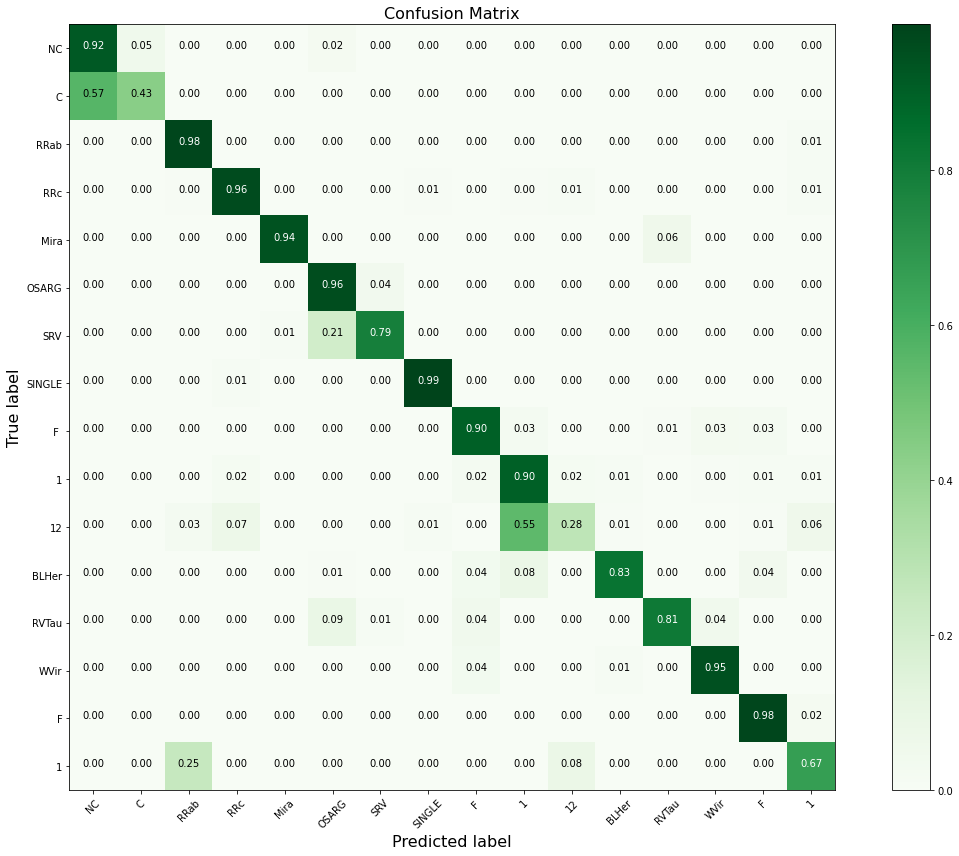

In [ ]:
labels  =  [ 'NC' , 'C',  'RRab' ,
            'RRc','Mira' , 'OSARG' , 'SRV' ,
            'SINGLE' , ' F ' , '1' , '12' , 'BLHer'  ,
            'RVTau' , 'WVir' , 'F' , '1' ]
plot_confusion_matrix(cm = cm , 
                      normalize    = True,
                      target_names = labels ,
                      title  = "Confusion Matrix",
                      file_name = 'NN_REP_CM_RNN_SUB.pdf')

# Colab HardWare features

From somewhere in reddit
> The VM used for Colaboratory appears to have 13GB RAM and 2 vCPU when checking using psutil (so a n1-highmem-2 instance)

- 2-core Xeon 2.2GHz
- 13GB RAM
- 33GB HDD

maximum lifetime of a VM is 12 hours. Idle VMs time out after 90m

In [ ]:
from psutil import *

In [ ]:
cpu_count()

2

In [ ]:
cpu_stats()

scpustats(ctx_switches=100396927, interrupts=43226717, soft_interrupts=16007519, syscalls=0)

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4599.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          69G   41G   28G  60% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.8G     0  5.8G   0% /dev/shm
/dev/sda1        76G   44G   33G  58% /opt/bin
tmpfs           6.4G   48K  6.4G   1% /var/colab
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G  5.5G  9.6G  37% /content/drive


In [ ]:
virtual_memory()

svmem(total=13622194176, available=11867357184, percent=12.9, used=7718182912, free=170819584, active=1826168832, inactive=11148324864, buffers=154431488, cached=5578760192, shared=6483968, slab=285188096)

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17615762017472249388, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11345264640
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7546947098424037413
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]